In [1]:
from collections import Counter
from user_agents import parse
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
import ndjson
import json

# Now let' try to reply all the later analysis. 

In [2]:
with open('state-of-js-2019/state_of_js_2019_normalized_responses_anon.ndjson') as file:
    data = ndjson.load(file)

In [3]:
df = pd.read_json(ndjson.dumps(data),lines=True)

In [4]:
df.happiness[0]

{'javascript_flavors': 3,
 'front_end_frameworks': 4,
 'data_layer': 2,
 'back_end_frameworks': 2,
 'testing': 3,
 'mobile_desktop': 3}

# Let's do the graphs

In [5]:
A = {}
names, _ = list(zip(*list(df.tools[0].items())))
for i in df.tools:
    try:
        if len(i)>1:
            for j in names:
                try:
                    if (j,i[j]['experience']) in A:
                        A[(j,i[j]['experience'])] += 1
                    else:
                        A[(j,i[j]['experience'])] = 1
                except:
                    pass
    except:
        pass

In [6]:
A= list(A.items())
A.sort(key=lambda x:x[0])

In [7]:
DF = {}
DF['framework'] = []
for i in np.sort(names):
    for j in A:
        if i == j[0][0]:
            if j[0][0] in DF['framework']:
                pass
            else:
                DF['framework'].append(j[0][0])
            try:
                DF[j[0][1]].append(j[1])
            except:
                DF[j[0][1]] = [j[1]]

In [8]:
Clean_Data_Interes = pd.DataFrame(DF)

In [9]:
Clean_Data_Interes.head()

,framework,interested,never_heard,not_interested,would_not_use,would_use
0,angular,1952,33,6504,7186,4395
1,apollo,7185,5273,1932,566,4956
2,ava,1712,13677,2752,576,997
3,clojurescript,2993,6412,10019,269,397
4,cordova,2042,3667,7871,4392,1709


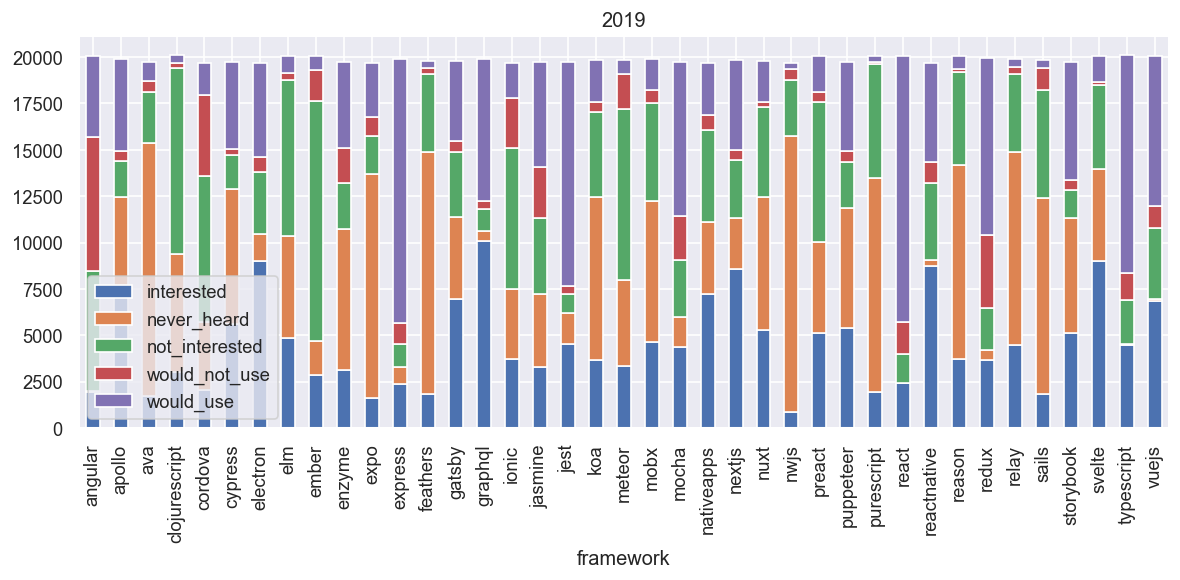

In [10]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes.set_index('framework').plot(kind='bar', stacked=True,ax=ax)
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/framework_dist2019.png',format = 'png',dpi=150)
plt.show()

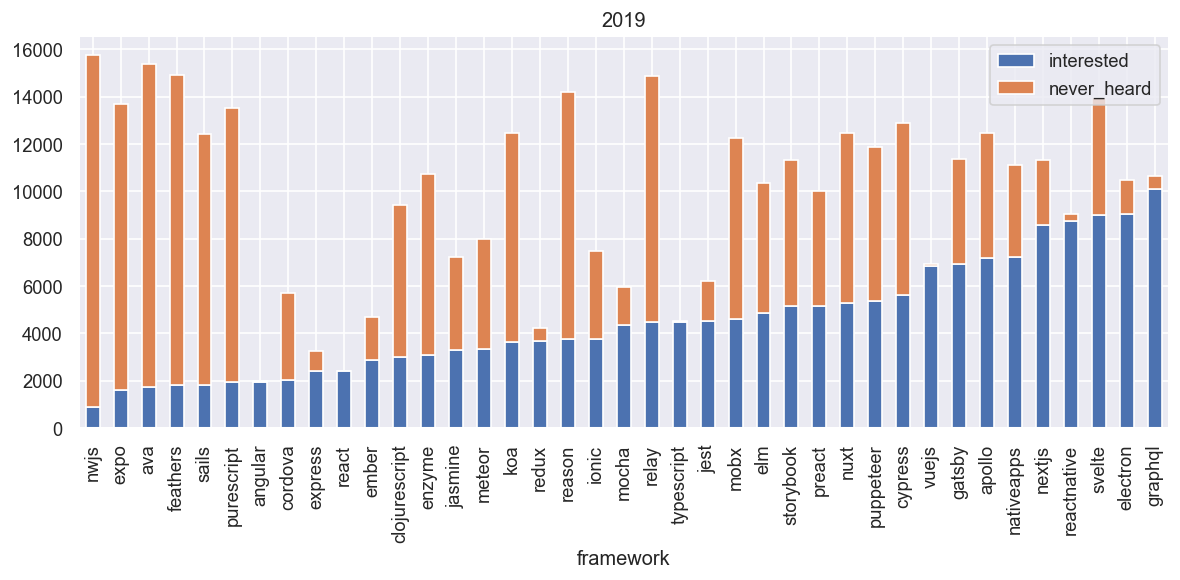

In [11]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','interested','never_heard']].sort_values('interested').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/framework_interesed_dist2019.png',format = 'png',dpi=150)
plt.show()

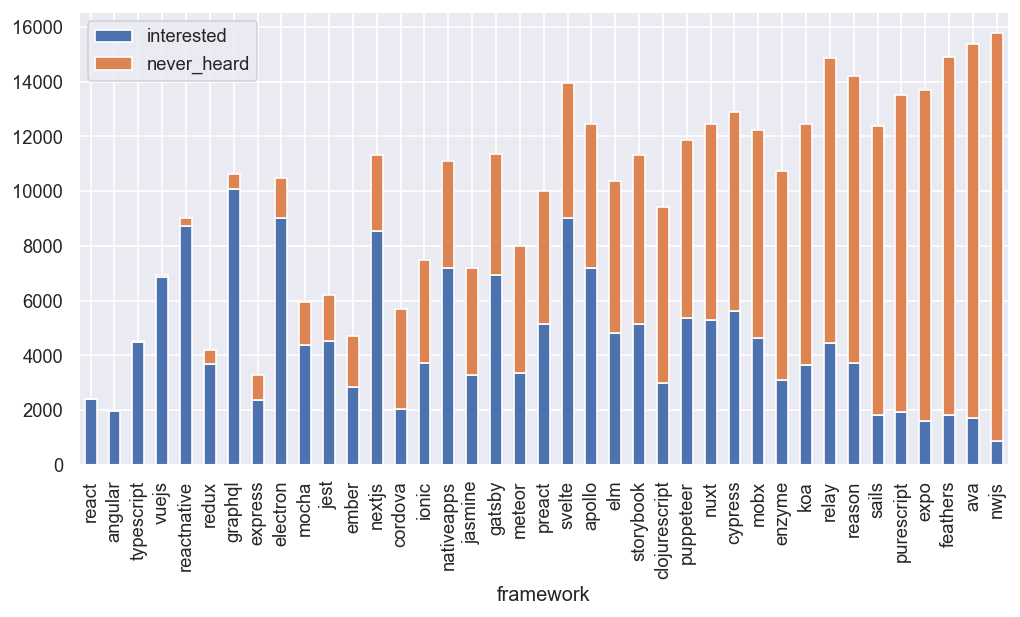

In [12]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','interested','never_heard']].sort_values('never_heard').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
plt.show()

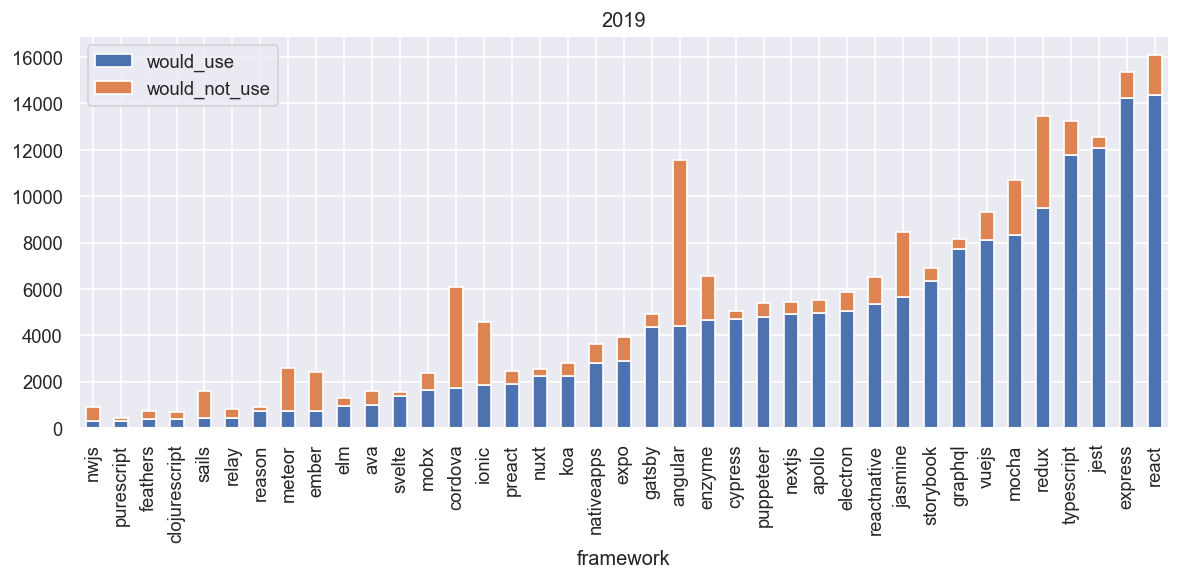

In [13]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','would_use','would_not_use']].sort_values('would_use').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/framework_would_use_dist2019.png',format = 'png',dpi=150)
plt.show()

In [14]:
dummy = {}
for i in df.user_info:
    for j in i:
        if 'company_size' in i and 'years_of_experience' in i and 'yearly_salary' in i:
            try:
                dummy[j].append(i[j])
            except:
                dummy[j] = [i[j]]

In [15]:
dummy.keys()

dict_keys(['device', 'backend_proficiency', 'company_size', 'css_proficiency', 'job_title', 'yearly_salary', 'years_of_experience', 'country', 'gender', 'country_name', 'country_alpha3', 'hash', 'how_did_user_find_out_about_the_survey', 'source_normalized', 'source_pattern', 'job_title_other'])

In [16]:
Data_Info = pd.DataFrame(dummy, columns=['years_of_experience','company_size','yearly_salary'])

In [17]:
Data_Info['os'] = df['os']

In [18]:
dummy = Counter(Data_Info.years_of_experience)
YOE = {}
YOE['years_of_experience'] = []
YOE['number_of_per'] = []
for i in dummy:
    YOE['years_of_experience'].append(i)
    YOE['number_of_per'].append(dummy[i])
YOE = pd.DataFrame(YOE)

In [19]:
YOE

,years_of_experience,number_of_per
0,5_10,5852
1,10_20,3412
2,less_than_1,468
3,2_5,6289
4,1_2,2083
5,more_than_20,779


In [20]:
YOE['class'] = np.array([4,5,1,3,2,6])

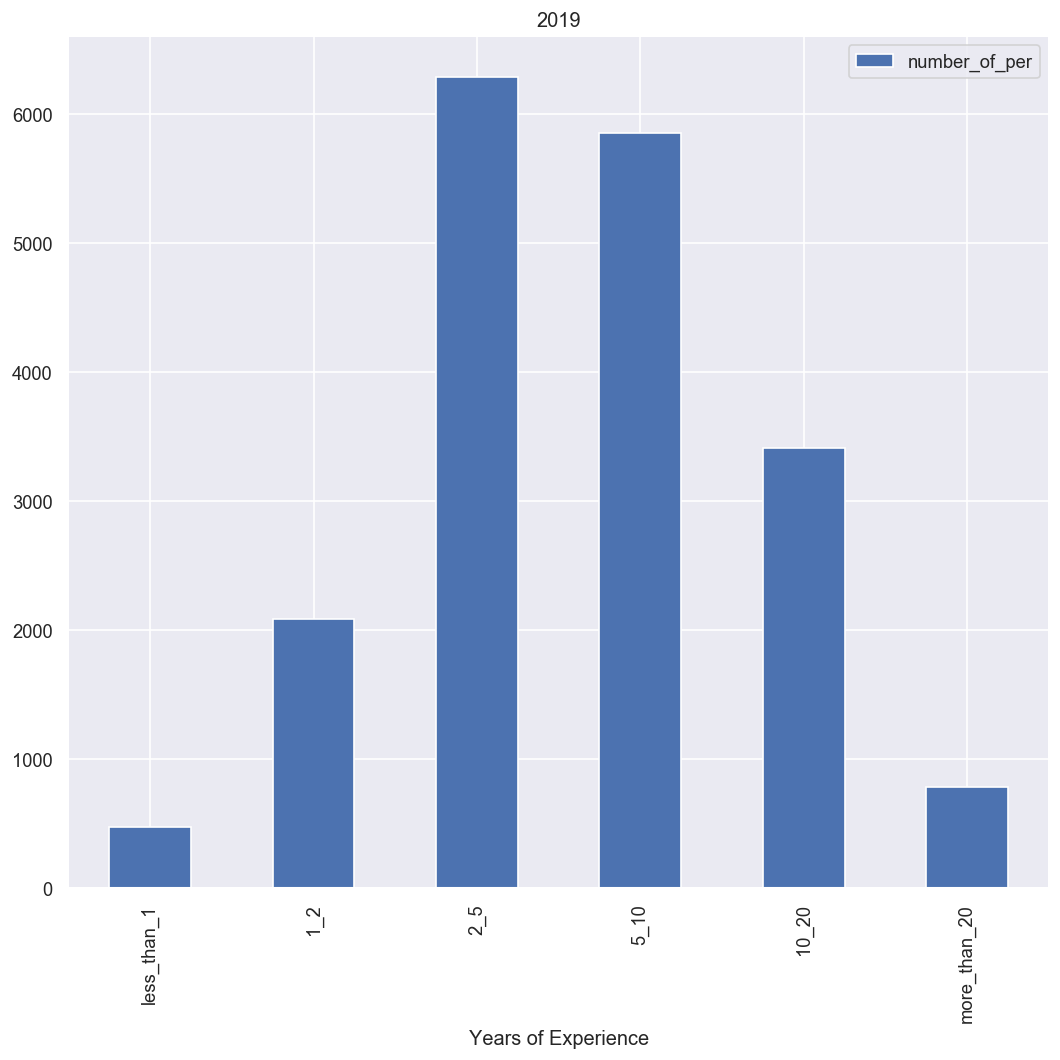

In [21]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = YOE.set_index('years_of_experience').sort_values('class').plot(kind='bar',y='number_of_per',ax=ax)
ax.set_xlabel('Years of Experience')
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/dist_yoe_2019.png',format = 'png',dpi=150)
plt.show()

In [22]:
dummy = Counter(Data_Info.company_size)
CZ = {}
CZ['company_size'] = []
CZ['count'] = []
for i in dummy:
    CZ['company_size'].append(i)
    CZ['count'].append(dummy[i])
CZ = pd.DataFrame(CZ)

In [23]:
CZ

,company_size,count
0,100_1000,4132
1,5_10,1404
2,1,1708
3,10_20,1855
4,more_than_1000,3576
5,20_50,2504
6,50_100,2184
7,1_5,1520


In [24]:
CZ['class'] = np.array([7,3,1,4,8,5,6,2])

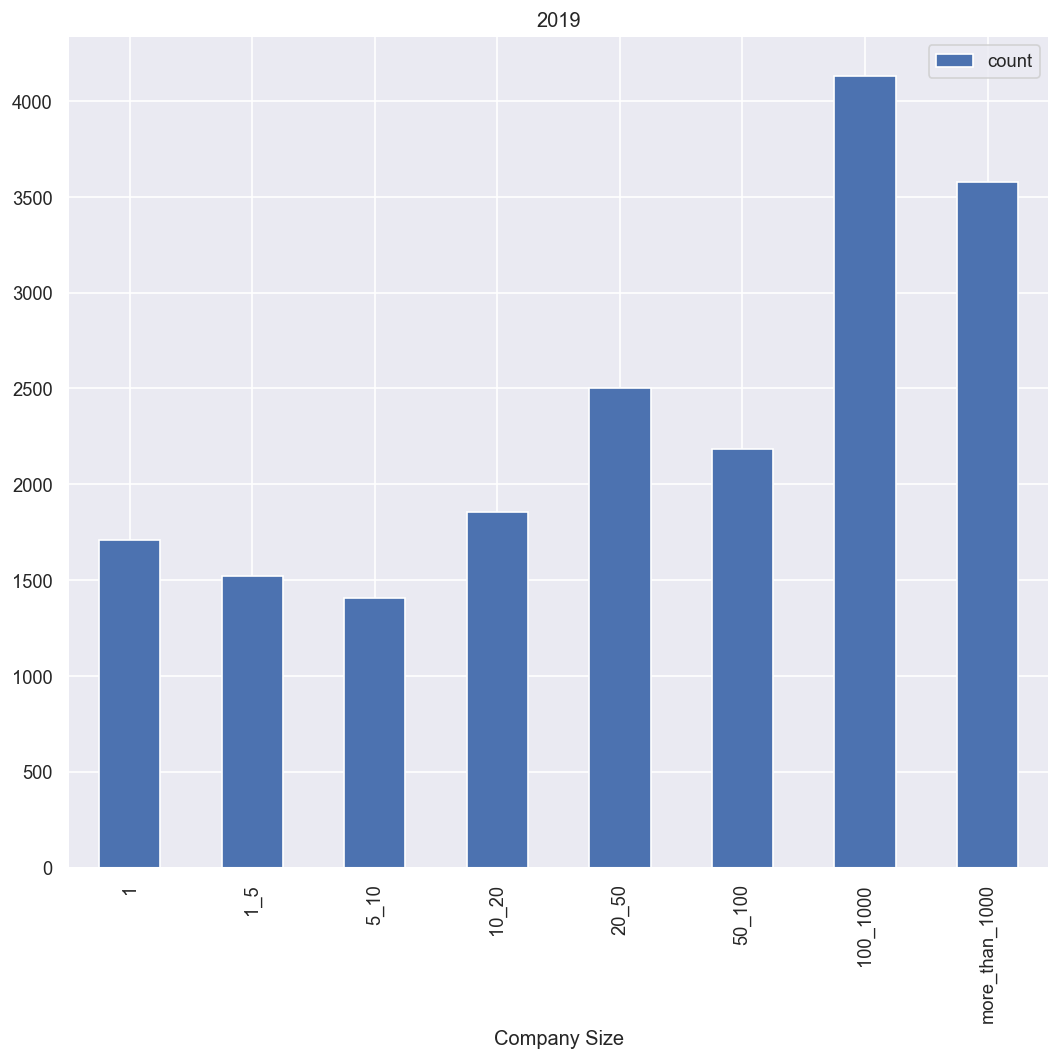

In [25]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = CZ.set_index('company_size').sort_values('class').plot(kind='bar',y='count',ax=ax)
ax.set_xlabel('Company Size')
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/dist_cz_2019.png',format = 'png',dpi=150)
plt.show()

In [26]:
dummy = Counter(Data_Info.yearly_salary)
YS = {}
YS['yearly_salary'] = []
YS['count'] = []
for i in dummy:
    YS['yearly_salary'].append(i)
    YS['count'].append(dummy[i])
YS = pd.DataFrame(YS)

In [27]:
YS

,yearly_salary,count
0,30_50,3643
1,50_100,5774
2,10_30,3017
3,work_for_free,908
4,100_200,3749
5,more_than_200,470
6,0_10,1322


In [28]:
YS['class'] = np.array([4,5,3,1,6,7,2])

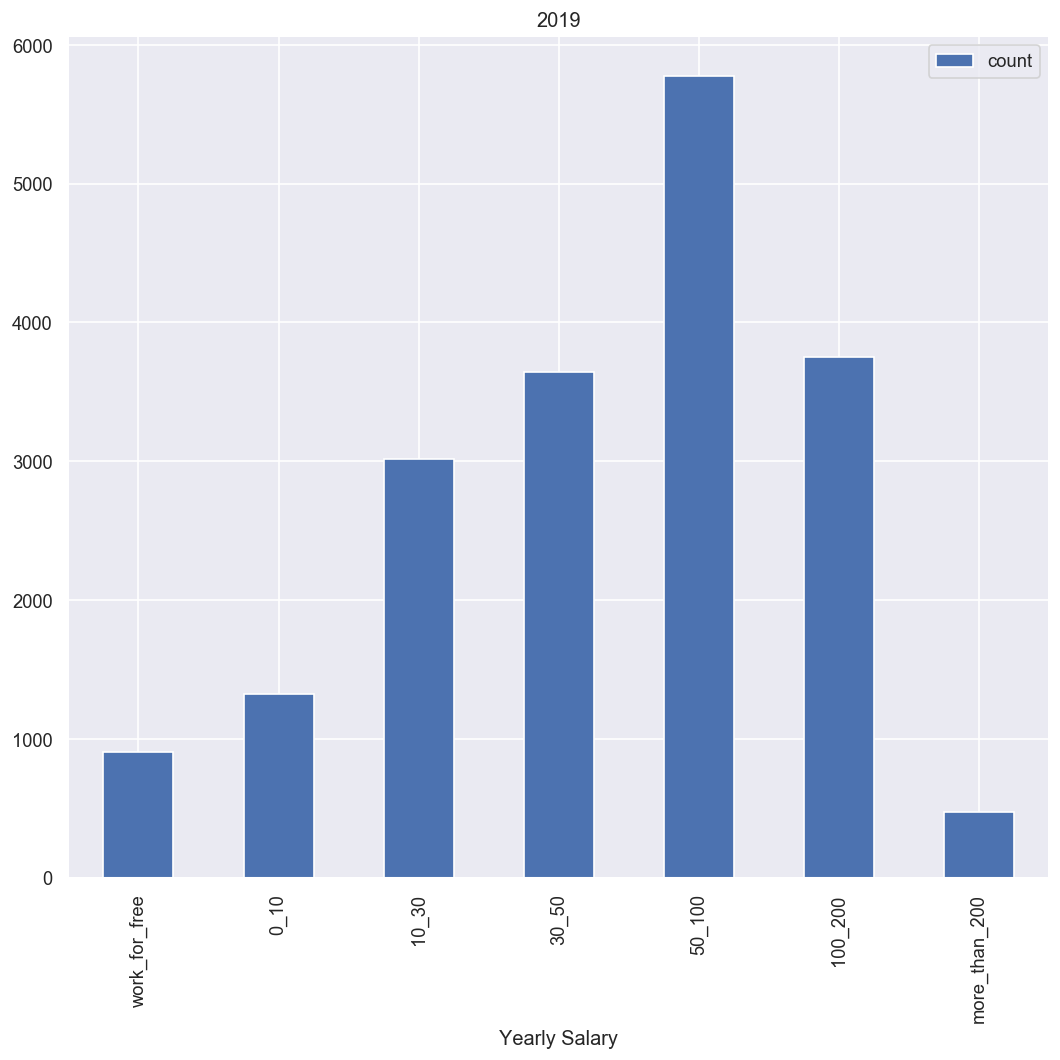

In [29]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = YS.set_index('yearly_salary').sort_values('class').plot(kind='bar',y='count',ax=ax)
ax.set_xlabel('Yearly Salary')
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/dist_ys_2019.png',format = 'png',dpi=150)
plt.show()

In [30]:
Data_Info['Class_YOE'] = Data_Info['years_of_experience']
Data_Info['Class_YS'] = Data_Info['yearly_salary']
Data_Info['Class_CZ'] = Data_Info['company_size']

In [31]:
def detDict(DF,column):
    Dict = {}
    for i,j in zip(DF[column],DF['class']):
        Dict[i] = j-1
    return Dict

In [32]:
Data_Info['Class_YOE'] = Data_Info['Class_YOE'].replace(detDict(YOE,'years_of_experience'))
Data_Info['Class_YS'] = Data_Info['Class_YS'].replace(detDict(YS,'yearly_salary'))
Data_Info['Class_CZ'] = Data_Info['Class_CZ'].replace(detDict(CZ,'company_size'))

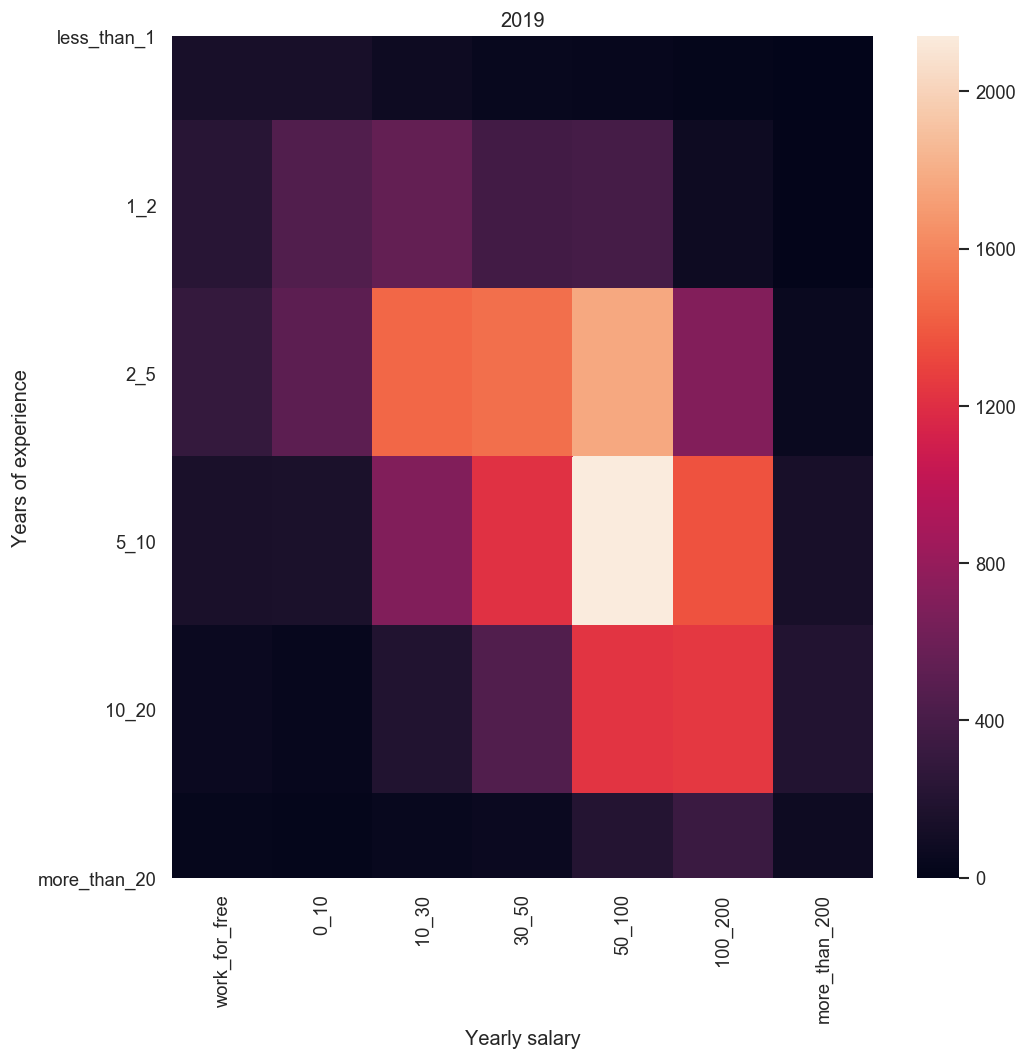

In [33]:
htmap_CYOE_CYS = np.zeros((len(YOE),len(YS)))
for i,j in zip(Data_Info['Class_YOE'],Data_Info['Class_YS']):
    htmap_CYOE_CYS[i,j] += 1
    
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = sbn.heatmap(htmap_CYOE_CYS,ax=ax,\
                 xticklabels=YS.sort_values('class')['yearly_salary'],\
                yticklabels=YOE.sort_values('class')['years_of_experience'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_xlabel('Yearly salary')
ax.set_ylabel('Years of experience')
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/hp_yoe_ys_2019.png',format = 'png',dpi=150)
plt.show()

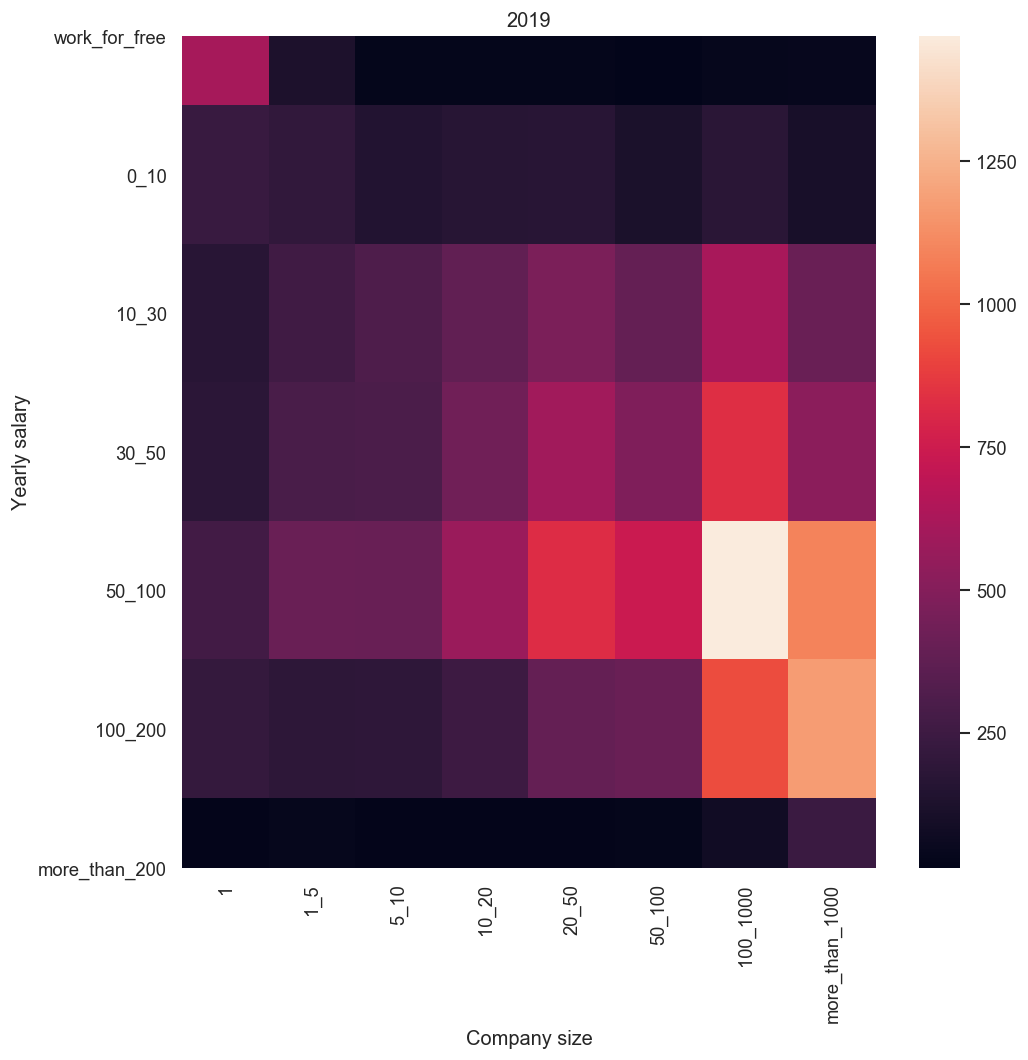

In [34]:
htmap_CZ_CYS = np.zeros((len(YS),len(CZ)))
for i,j in zip(Data_Info['Class_YS'],Data_Info['Class_CZ']):
    htmap_CZ_CYS[i,j] += 1
    
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = sbn.heatmap(htmap_CZ_CYS,ax=ax,\
                 xticklabels=CZ.sort_values('class')['company_size'],\
                yticklabels=YS.sort_values('class')['yearly_salary'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_ylabel('Yearly salary')
ax.set_xlabel('Company size')
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/hp_ys_cs_2019.png',format = 'png',dpi=150)
plt.show()

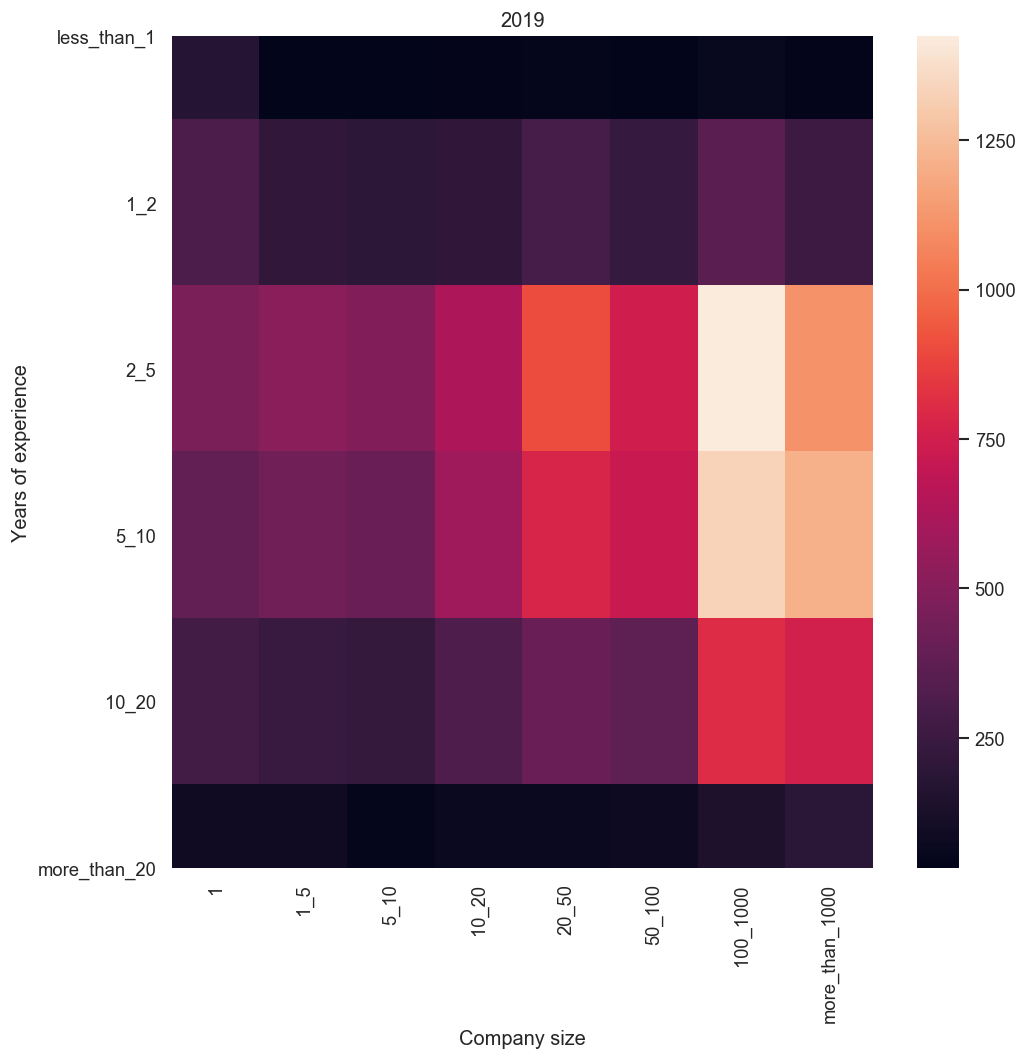

In [35]:
htmap_CZ_CYOE = np.zeros((len(YOE),len(CZ)))
for i,j in zip(Data_Info['Class_YOE'],Data_Info['Class_CZ']):
    htmap_CZ_CYOE[i,j] += 1

f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
ax = sbn.heatmap(htmap_CZ_CYOE,ax=ax,\
                 xticklabels=CZ.sort_values('class')['company_size'],\
                yticklabels=YOE.sort_values('class')['years_of_experience'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_xlabel('Company size')
ax.set_ylabel('Years of experience')
ax.set_title('2019')
f.tight_layout()
f.savefig(fname='img/2019/hp_cs_yoe_2019.png',format = 'png',dpi=150)
plt.show()

In [36]:
# dummy = {}
# for i in Data_Info.user_agent.apply(lambda x: x.split('/')):
#     try:
#         dummy[i[0].replace(' ','')] +=1
#     except:
#         dummy[i[0].replace(' ','')] = 1

# dum = {}
# for i in dummy:
#     if i == 'PC':
#         pass
#     else:
#         try:
#             dum['mobile'] += 1
#         except:
#             dum['mobile'] = 1
        
# dum['PC'] = dummy['PC']

# dummy = {}
# dummy['dispositive'] = []
# dummy['Number_of_Users'] = []
# for i in dum:
#     dummy['dispositive'].append(i)
#     dummy['Number_of_Users'].append(dum[i])

# Data_Disp = pd.DataFrame(dummy)
# f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
# ax = Data_Disp.set_index('dispositive').plot(kind='pie',subplots=True,ax=ax)
# f.tight_layout()
# f.savefig(fname='img/2019/pie_disp_2019.png',format = 'png',dpi=150)
# plt.show()

In [37]:
# dummy = {}
# for i in Data_Info.user_agent.apply(lambda x: x.split('/')):
#     try:
#         dummy[i[1].replace(' ','')[:6]] +=1
#     except:
#         dummy[i[1].replace(' ','')[:6]] = 1
        
# dum = {}
# for i in dummy:
#     if 'iOS' in i:
#         try:
#             dum['iOS'] += dummy[i]
#         except:
#             dum['iOS'] = dummy[i]
#     else:
#         dum[i] = dummy[i]

# dummy={}
# dummy['OS'] = []
# dummy['Number_of_Users'] = []
# dummy['Mobile'] = []
# for i in dum:
#     if 'Andro' in i or 'iOS' in i:
#         dummy['Mobile'].append(1)
#     else:
#         dummy['Mobile'].append(0)
#     dummy['OS'].append(i)
#     dummy['Number_of_Users'].append(dum[i])

# Data_OS = pd.DataFrame(dummy)

In [38]:
dummy = {}
dummy['OS'] = []
dummy['Number_of_Users'] = []
for i,j in Counter(Data_Info.os).items():
    dummy['OS'].append(i)
    dummy['Number_of_Users'].append(j)
Data_OS = pd.DataFrame(dummy)

In [39]:
Data_OS = Data_OS.dropna()

In [40]:
Data_OS

,OS,Number_of_Users
0,Windows,4069
1,iOS,2075
2,Linux,1831
3,macOS,8034
4,Android,2851
5,Chrome OS,21


In [41]:
Data_OS['Mobile'] = [0,1,0,0,1,0]

In [42]:
Data_OS['Open_Source'] = [0,0,1,0,1,1]

In [43]:
Data_OS['Open_Source'] = Data_OS['Open_Source'].replace({0:'Non OSS',1:'OSS'})

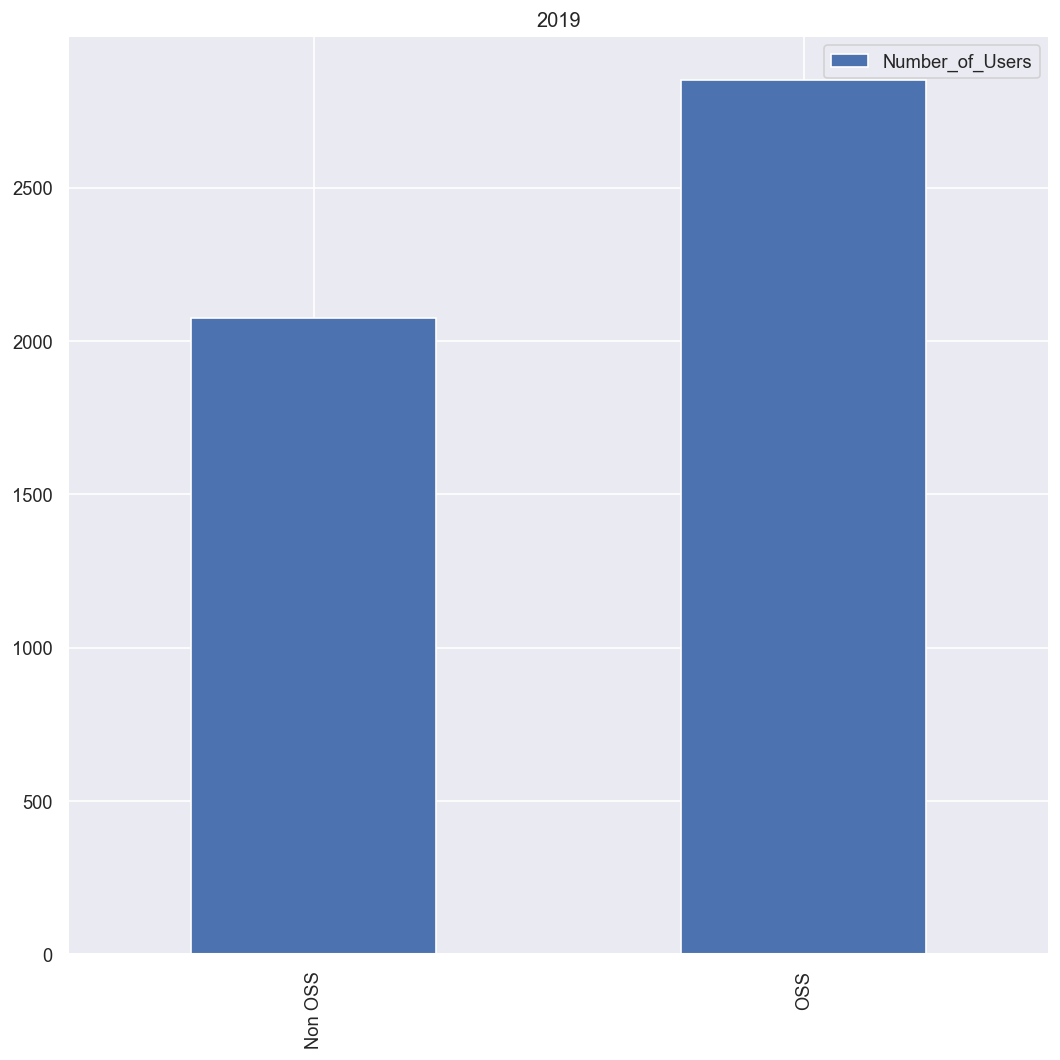

In [44]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==1].groupby(by='Open_Source').agg({'Number_of_Users':'sum'}).plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2019')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2019/dist_noss_oss_2019_mobile.png',format='png',dpi=150)
plt.show()

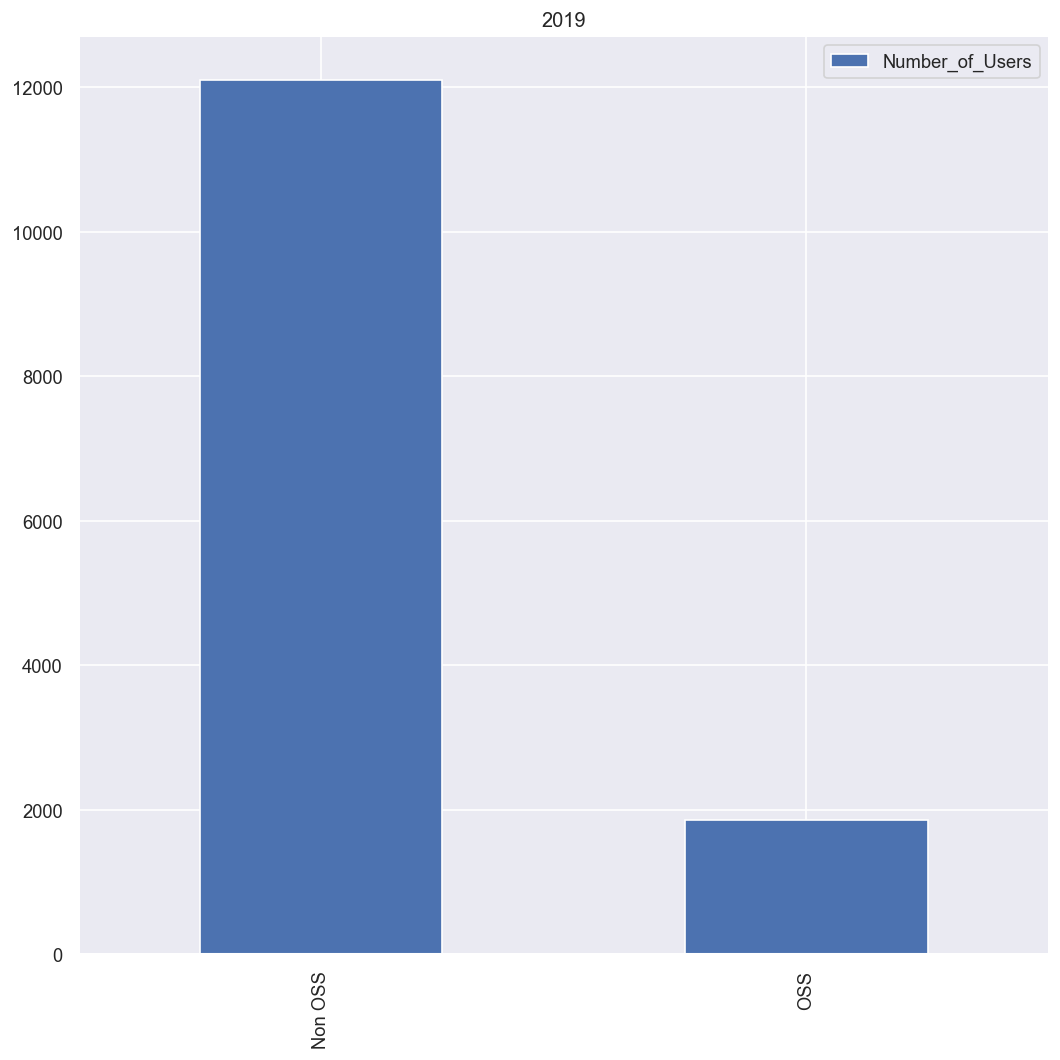

In [45]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==0].groupby(by='Open_Source').agg({'Number_of_Users':'sum'}).plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2019')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2019/dist_noss_oss_2019_pc.png',format='png',dpi=150)
plt.show()

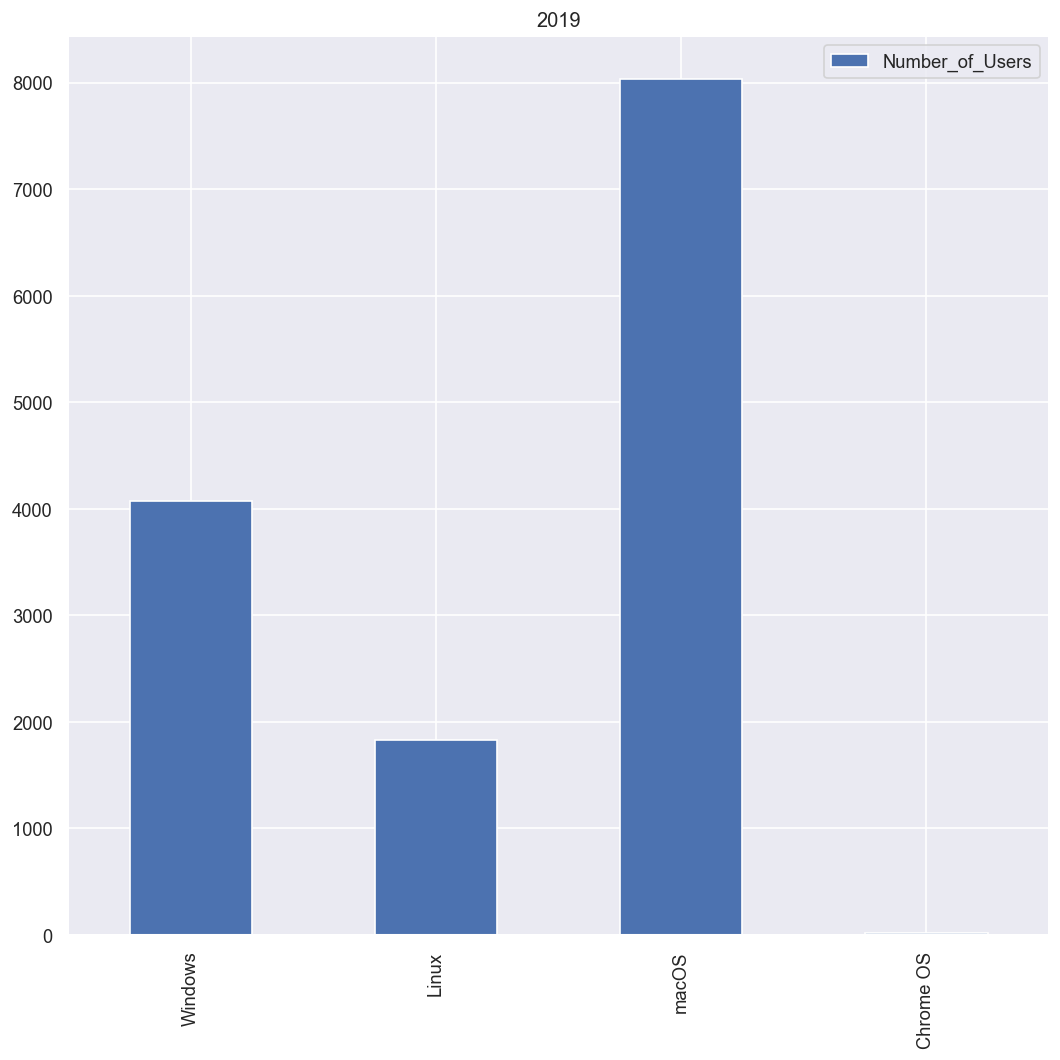

In [46]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==0].set_index('OS').plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2019')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2019/dist_os_2019_pc.png',format='png',dpi=150)
plt.show()

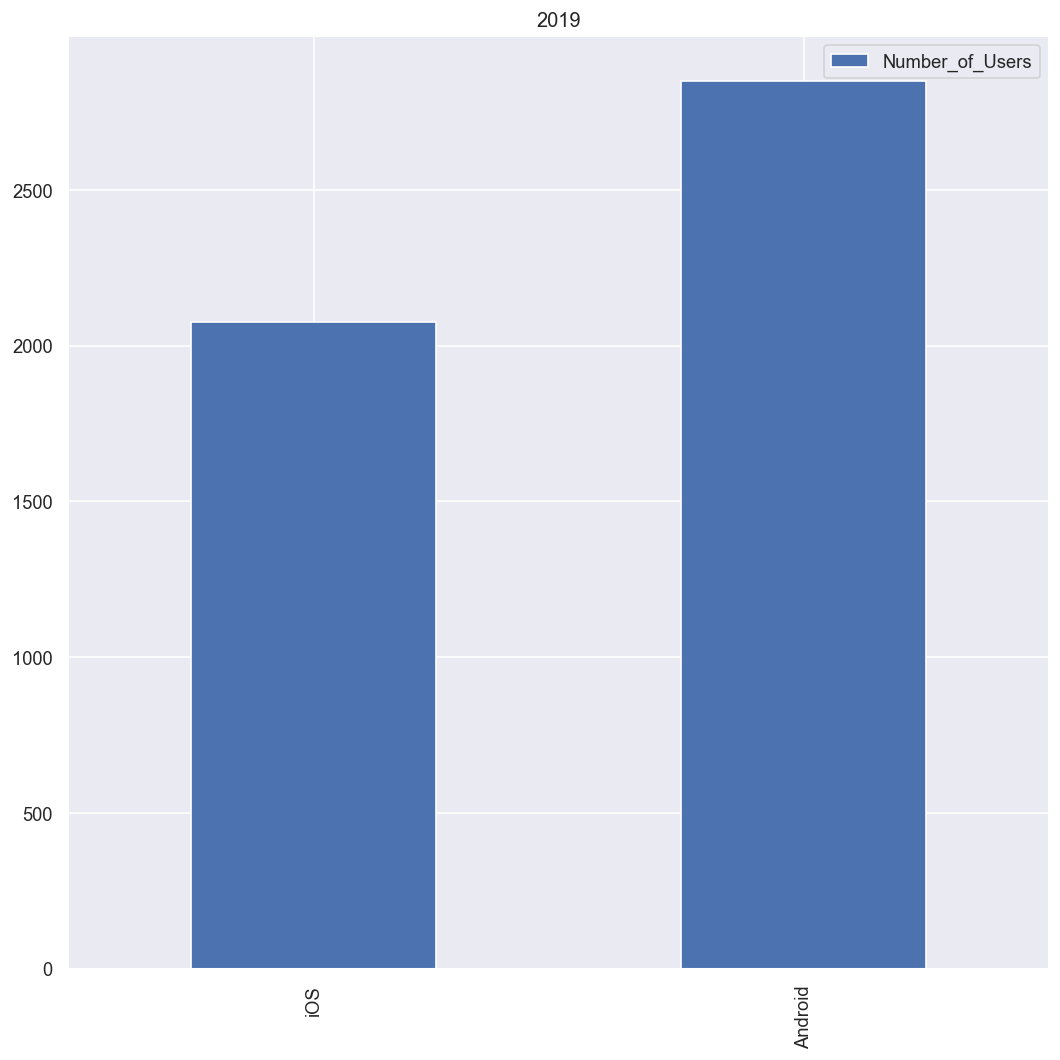

In [47]:
f,ax = plt.subplots(1,1,figsize=(9,9),dpi=120)
Data_OS[Data_OS.Mobile==1].set_index('OS').plot(kind='bar',y='Number_of_Users',ax=ax)
ax.set_title('2019')
ax.set_xlabel('')
f.tight_layout()
f.savefig(fname='img/2019/dist_os_2019_mobile.png',format='png',dpi=150)
plt.show()

# Now let's work on FEND

In [100]:
df.sections_other_tools.dropna()[6720]

{'javascript_flavors': 'GraphQL',
 'front_end_frameworks': 'Next.js',
 'data_layer': 'Prisma',
 'back_end_frameworks': 'Prisma, now',
 'testing': '-',
 'mobile_desktop': 'PWA Desktop',
 'javascript_flavors_normalized': ['graphql'],
 'javascript_flavors_patterns': ['/graphql/i'],
 'front_end_frameworks_normalized': ['nextjs'],
 'front_end_frameworks_patterns': ['/next(\\.| |-|_)?js/i'],
 'data_layer_normalized': ['prisma'],
 'data_layer_patterns': ['/prisma/i'],
 'back_end_frameworks_normalized': ['prisma'],
 'back_end_frameworks_patterns': ['/prisma/i'],
 'mobile_desktop_normalized': ['pwa'],
 'mobile_desktop_patterns': ['/pwa/i']}

In [80]:
dummy = {}
for i in df[df.sections_other_tools != {}].sections_other_tools.dropna():
    for j in i:
        try:
            dummy[j] = dummy[j]+i[j]
        except:
            dummy[j] = i[j]

fw_dicts = {}
fw_dicts_bad = {}
for i in dummy.keys():
    if '_normalized' in i:
        dum = {}
        dum['framework'] = []
        dum['Count'] = []
        for j,k in Counter(dummy[i]).items():
            dum['framework'].append(j)
            dum['Count'].append(k)
        fw_dicts[i] = pd.DataFrame(dum)
    else:
        dum = {}
        dum['framework'] = []
        dum['Count'] = []
        for j,k in Counter(dummy[i]).items():
            dum['framework'].append(j)
            dum['Count'].append(k)
        fw_dicts_bad[i] = pd.DataFrame(dum)
    
for i in fw_dicts:
    fw_dicts[i] = fw_dicts[i].sort_values('Count',ascending=False)

for i in fw_dicts_bad:
    fw_dicts_bad[i] = fw_dicts_bad[i].sort_values('Count',ascending=False)

In [81]:
fw_dicts_bad.keys()

dict_keys(['javascript_flavors', 'javascript_flavors_patterns', 'testing', 'testing_patterns', 'data_layer', 'data_layer_patterns', 'front_end_frameworks', 'front_end_frameworks_patterns', 'back_end_frameworks', 'back_end_frameworks_patterns', 'mobile_desktop', 'mobile_desktop_patterns'])

In [78]:
fw_dicts.keys()

dict_keys(['javascript_flavors_normalized', 'testing_normalized', 'data_layer_normalized', 'front_end_frameworks_normalized', 'back_end_frameworks_normalized', 'mobile_desktop_normalized'])

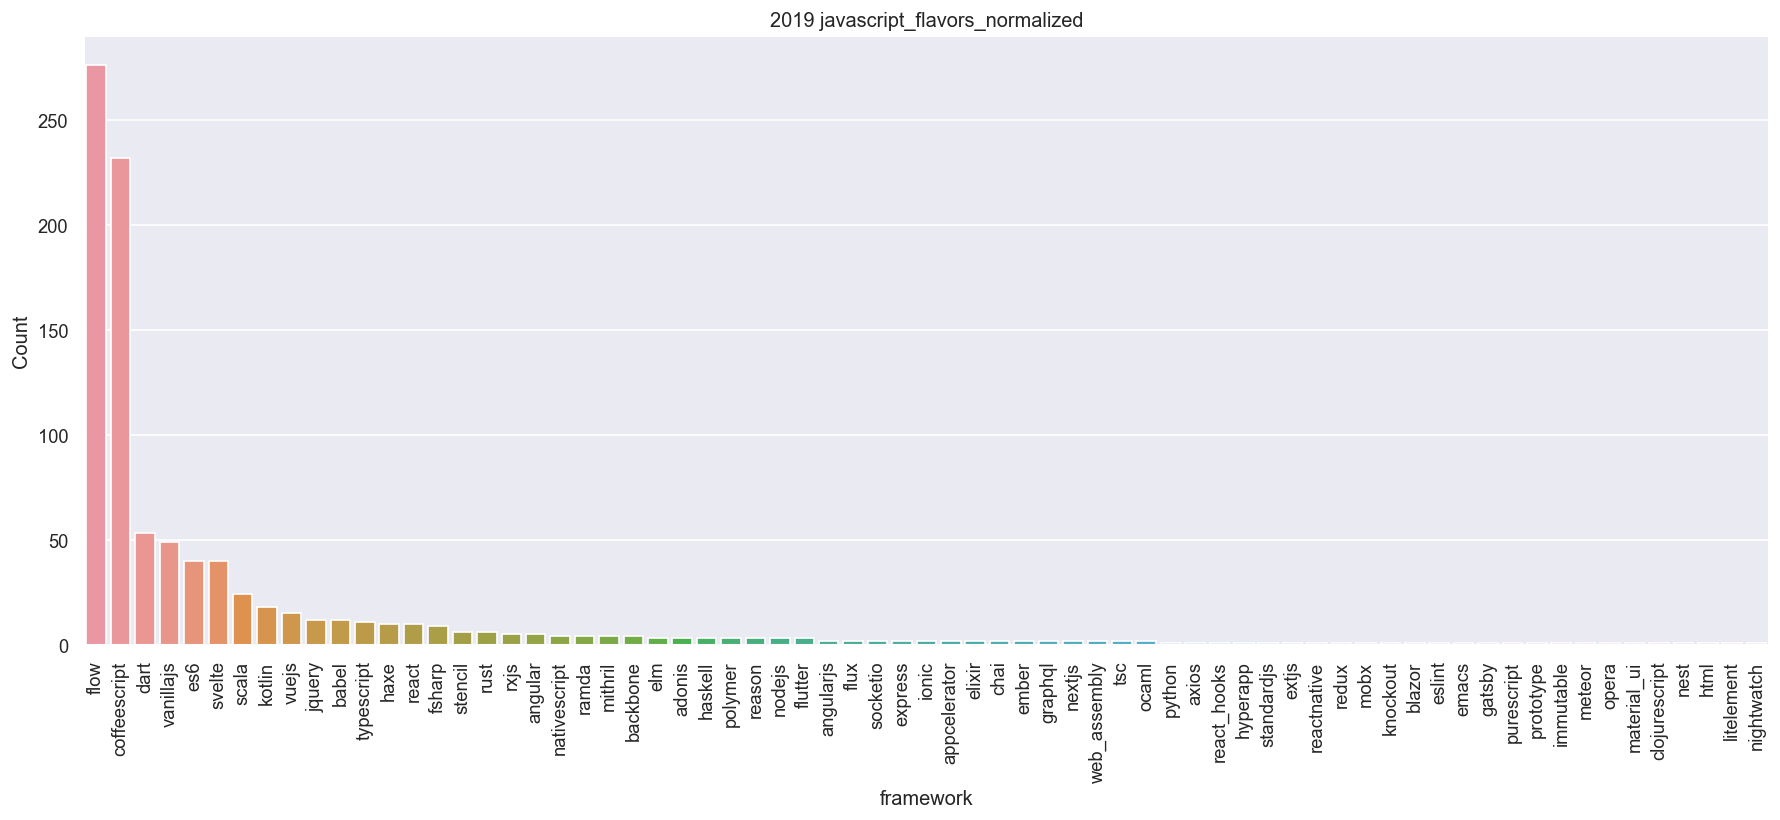

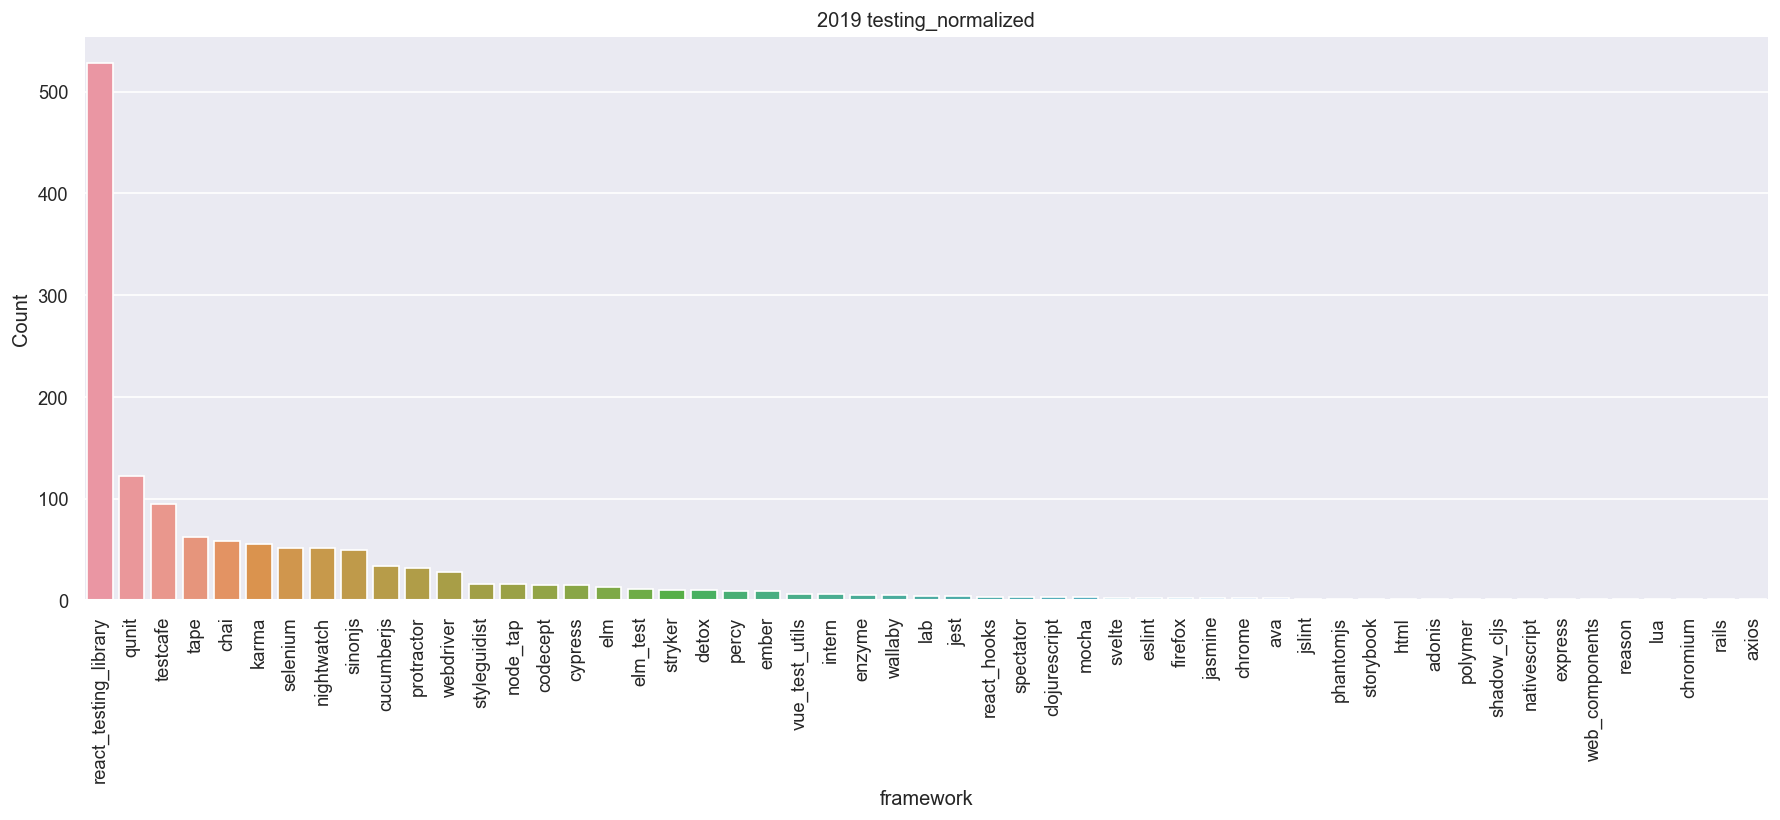

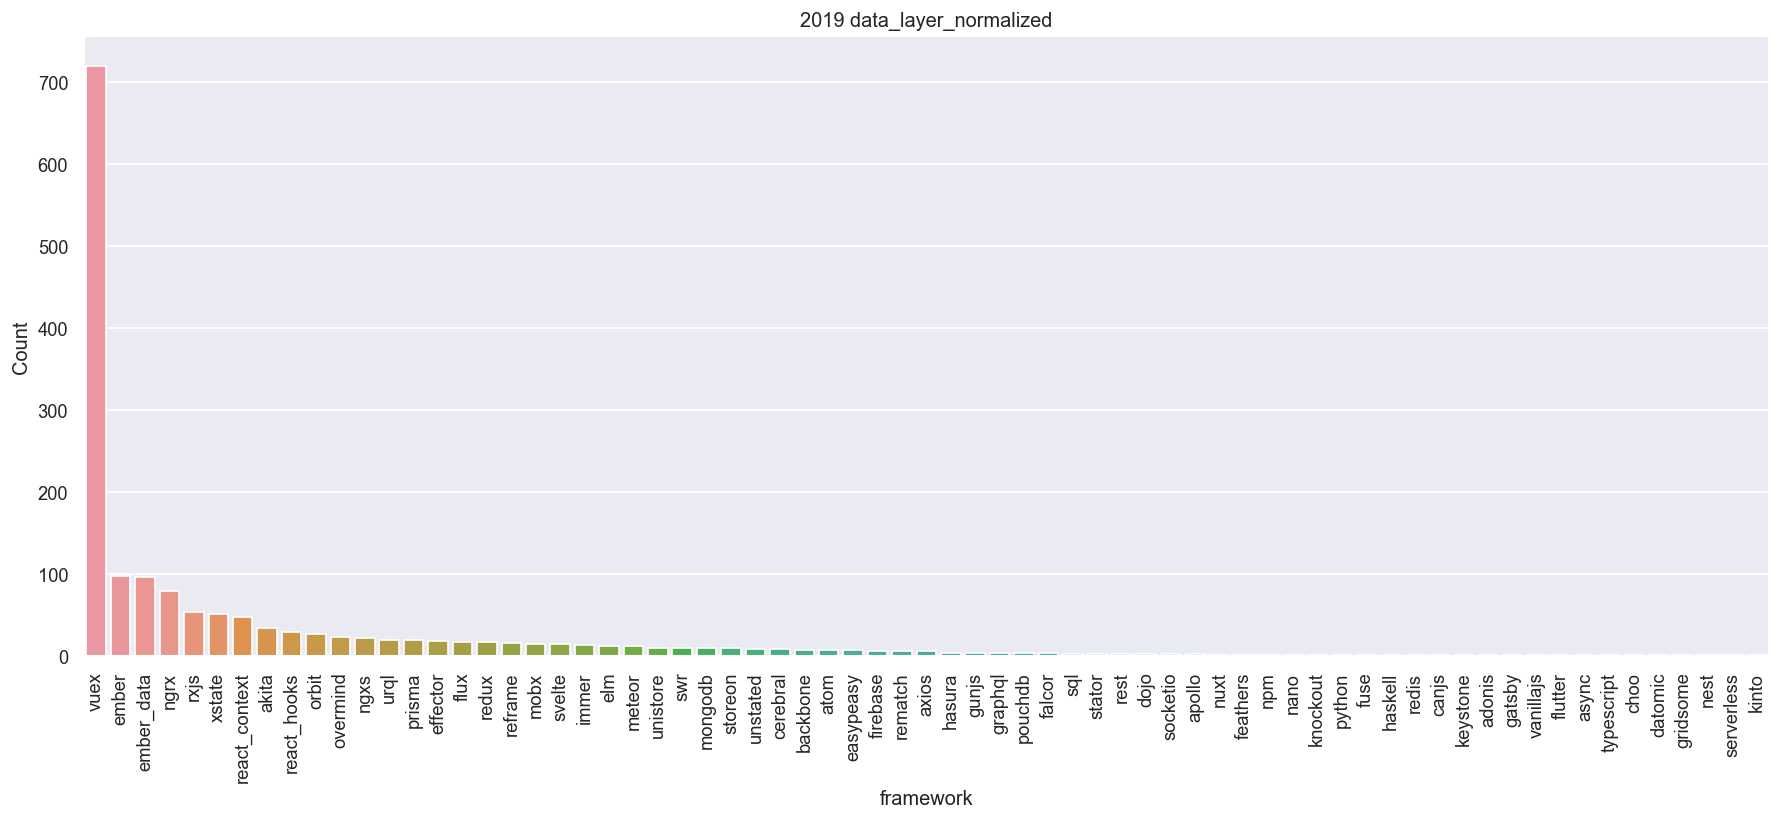

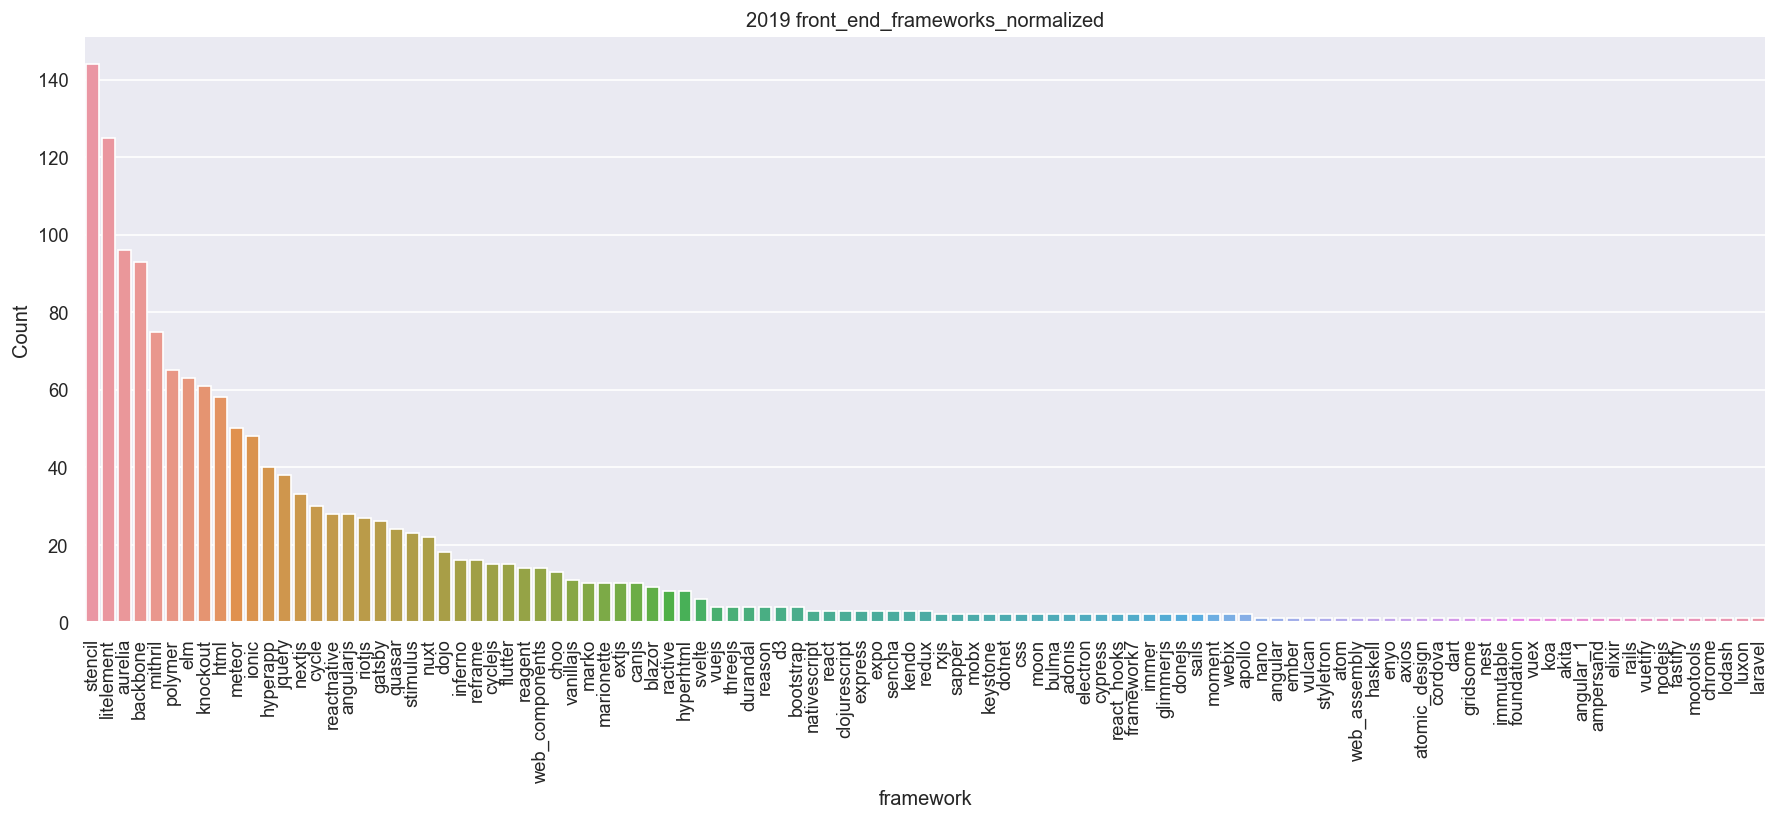

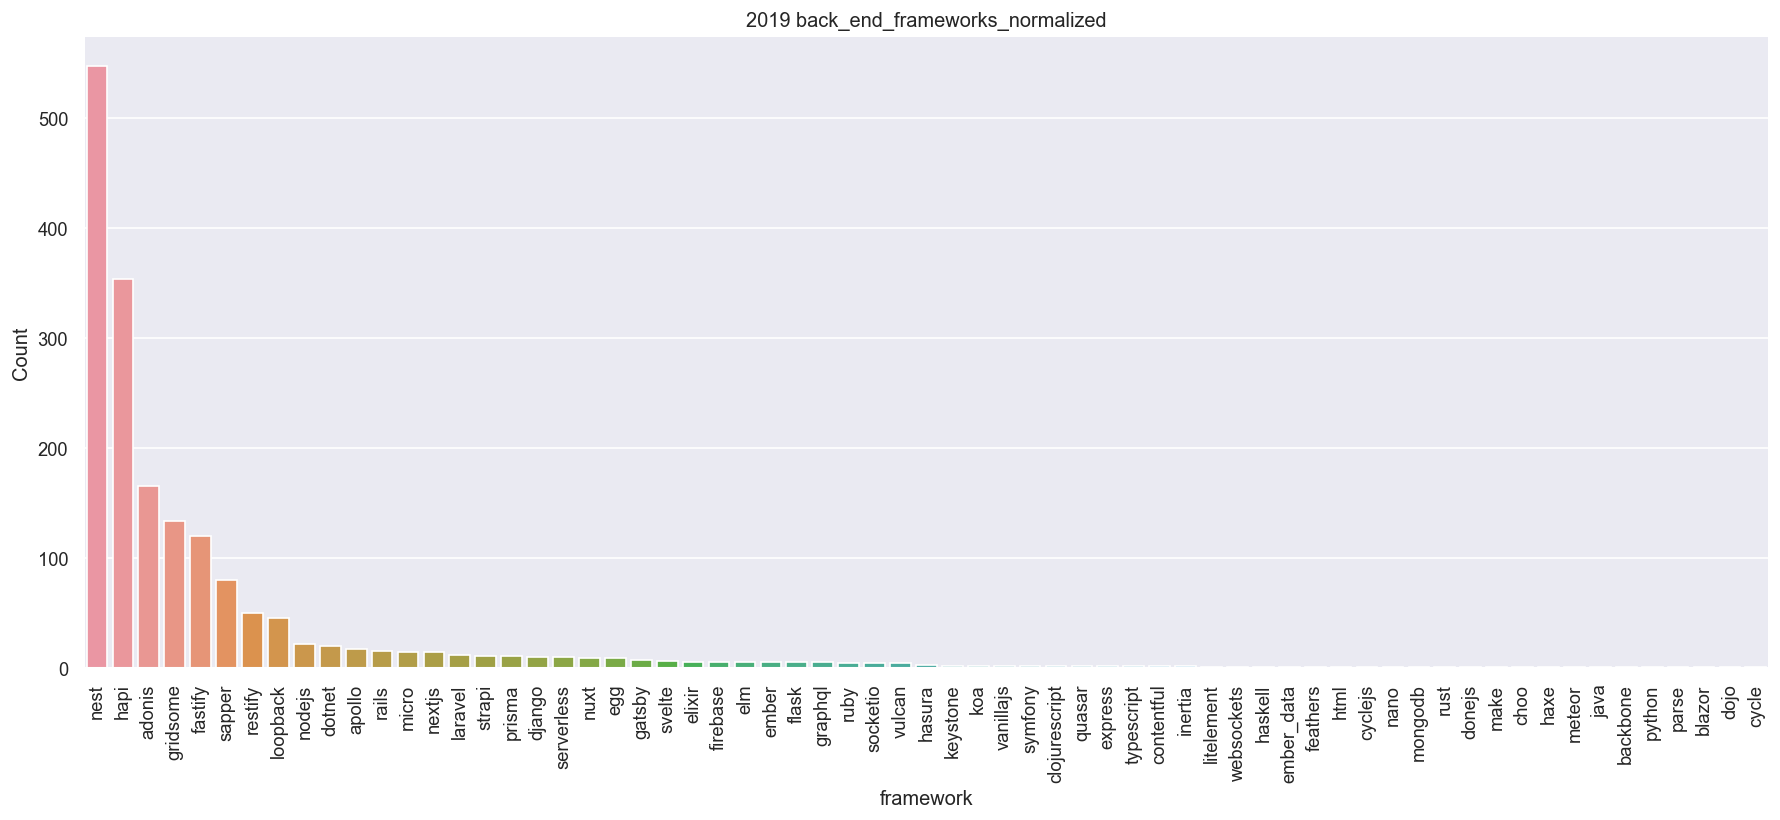

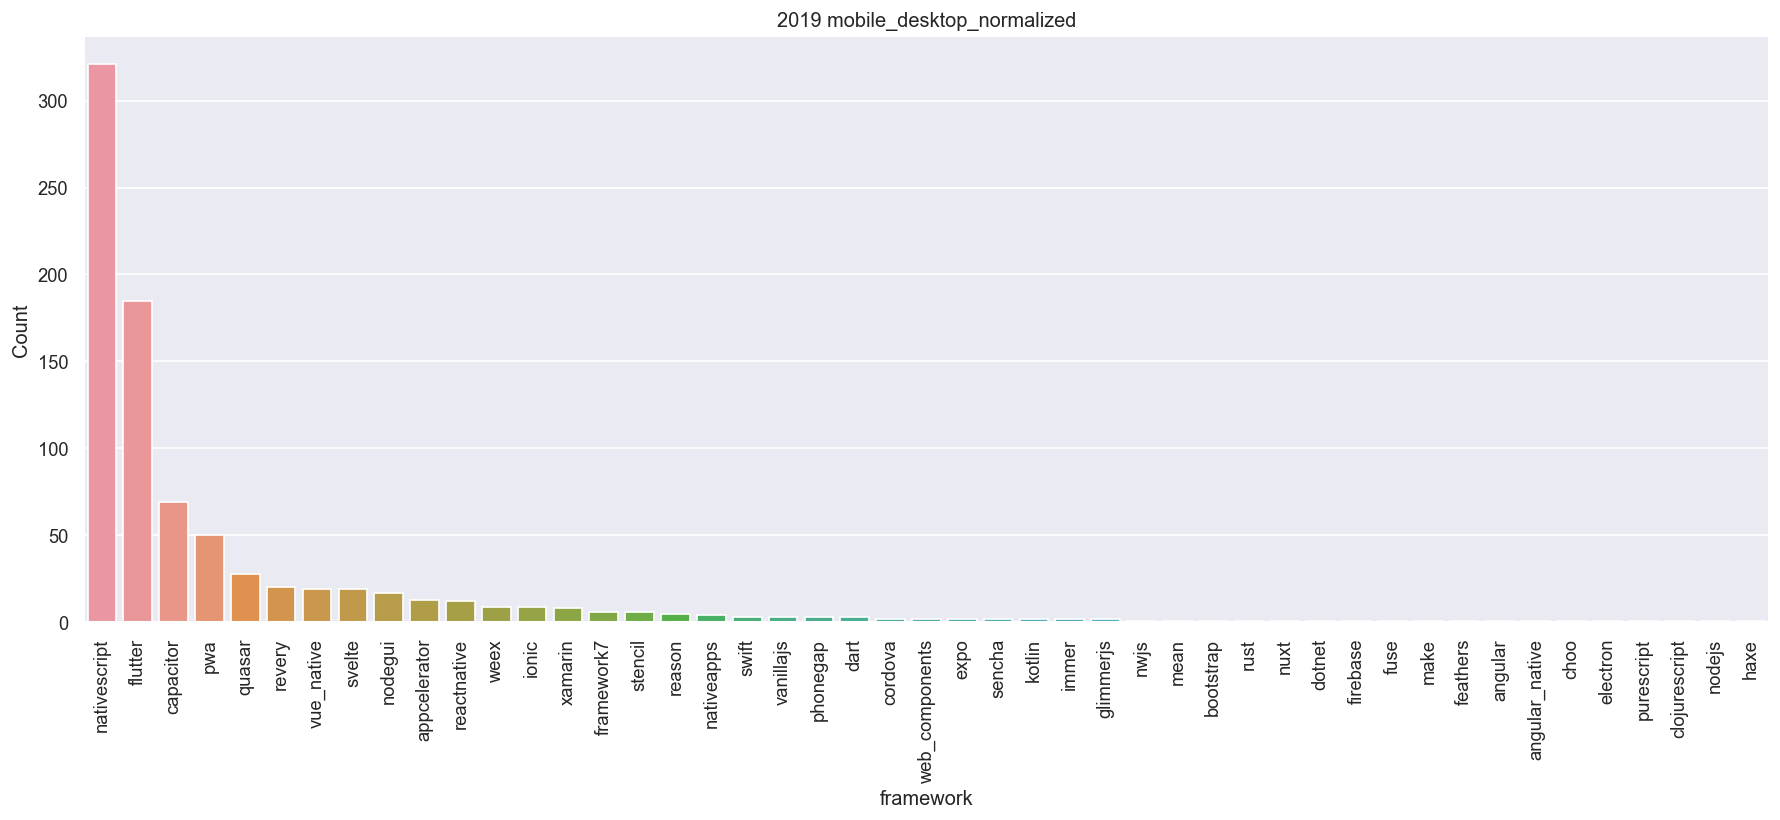

In [189]:
for i in fw_dicts.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='framework',y='Count',data=fw_dicts[i])
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_title('2019 '+i)
    f.tight_layout()
    f.savefig(fname='img/2019/i'+i+'dist_2019.png',format='png',dpi=150)
    plt.show()

# Happines

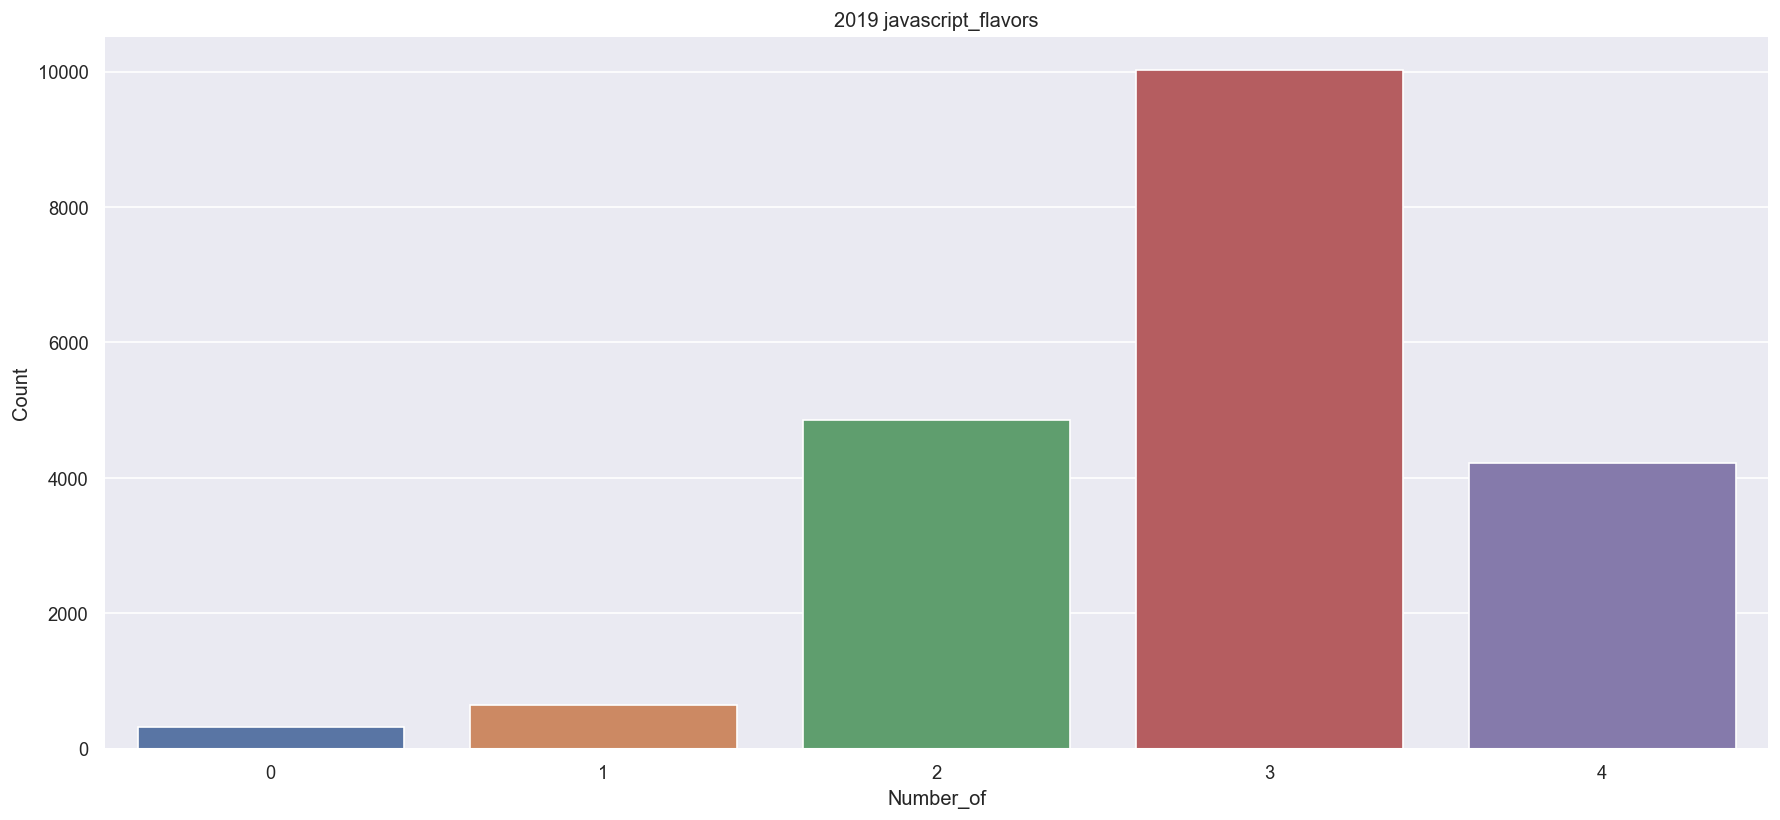

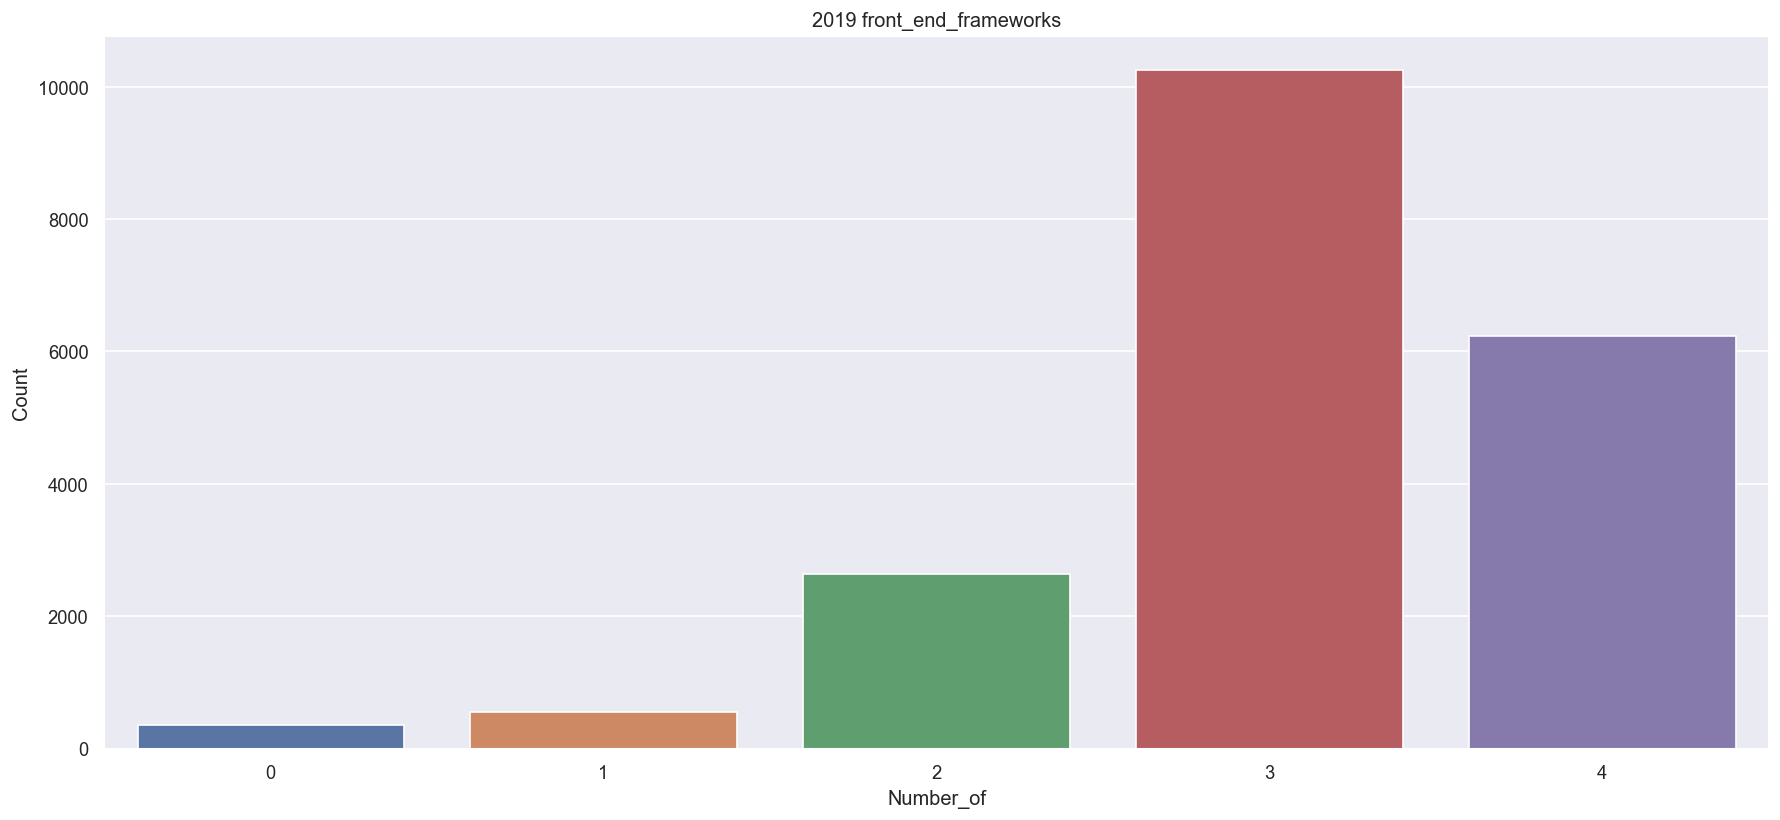

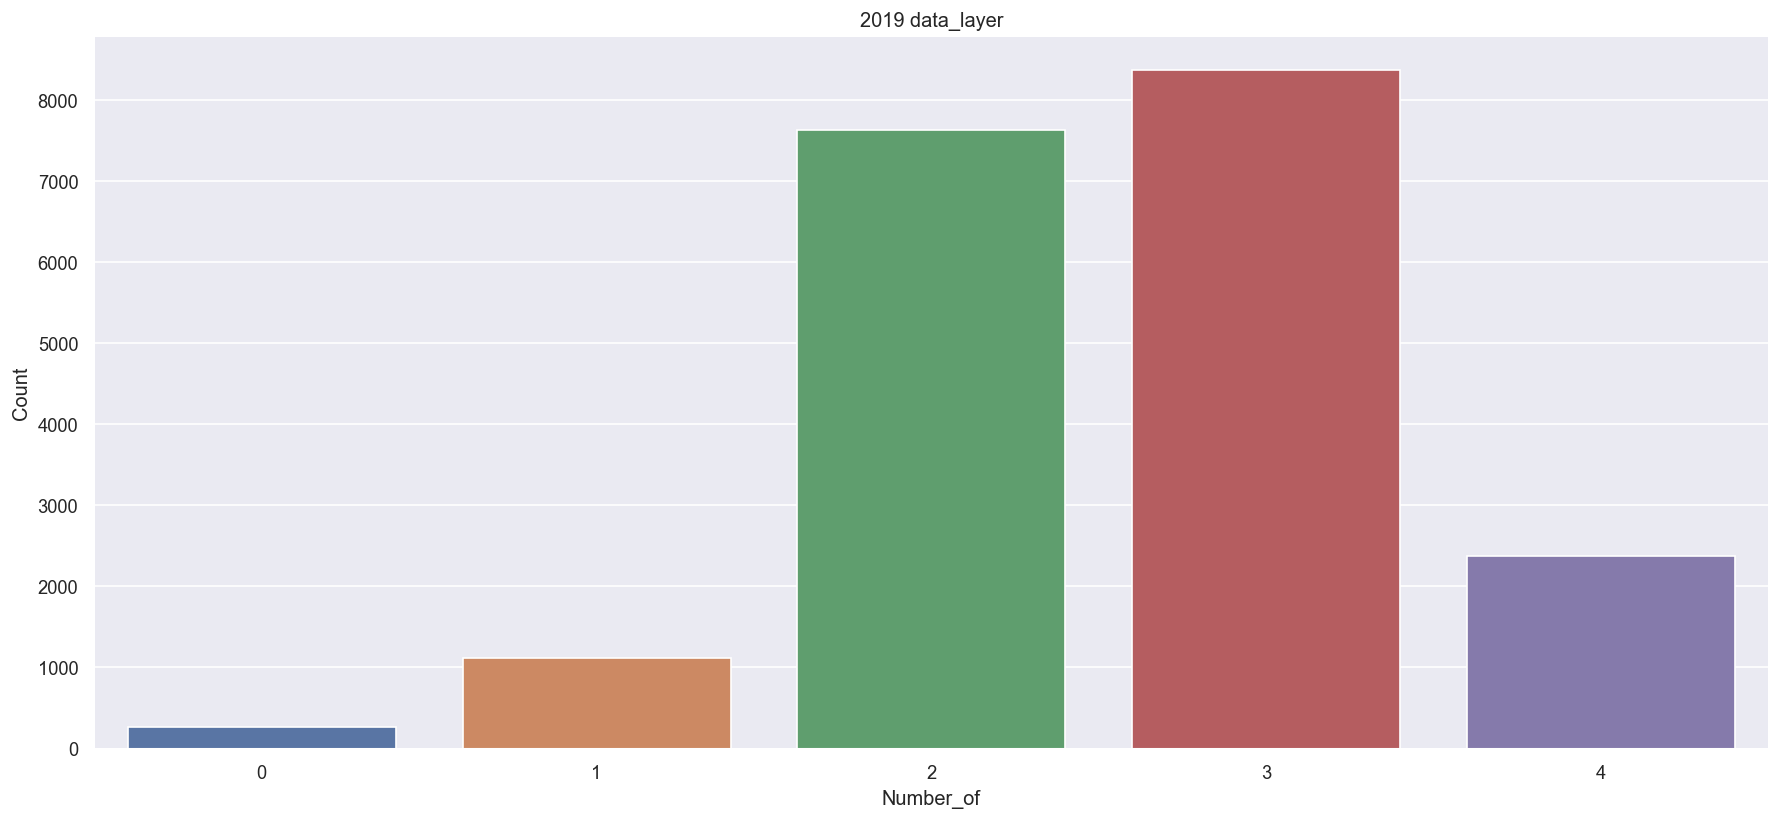

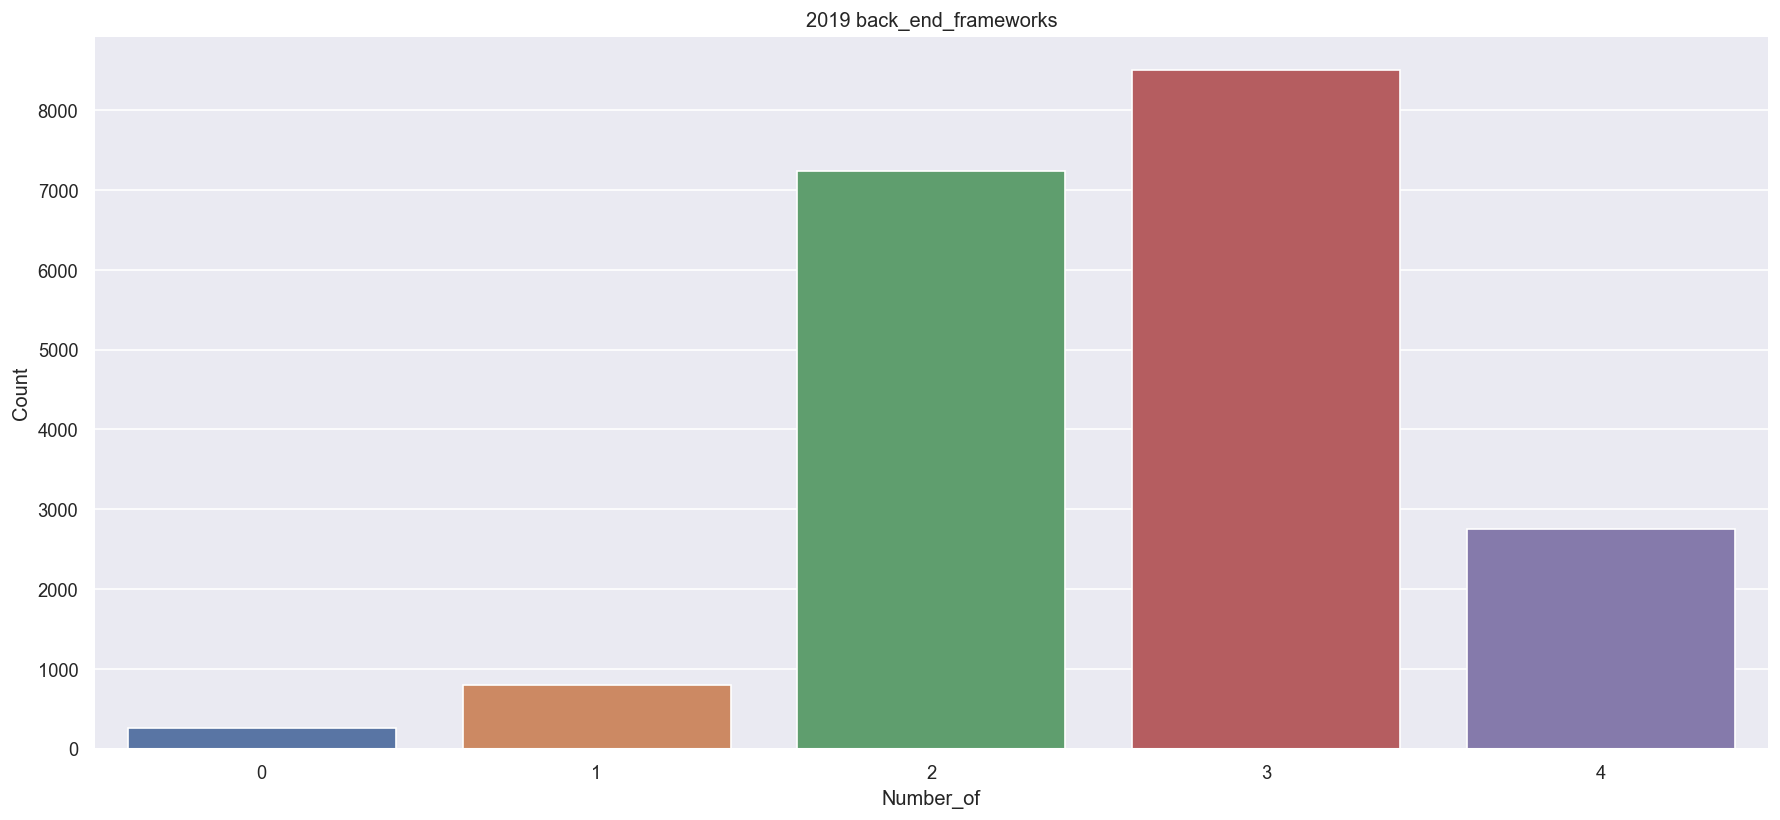

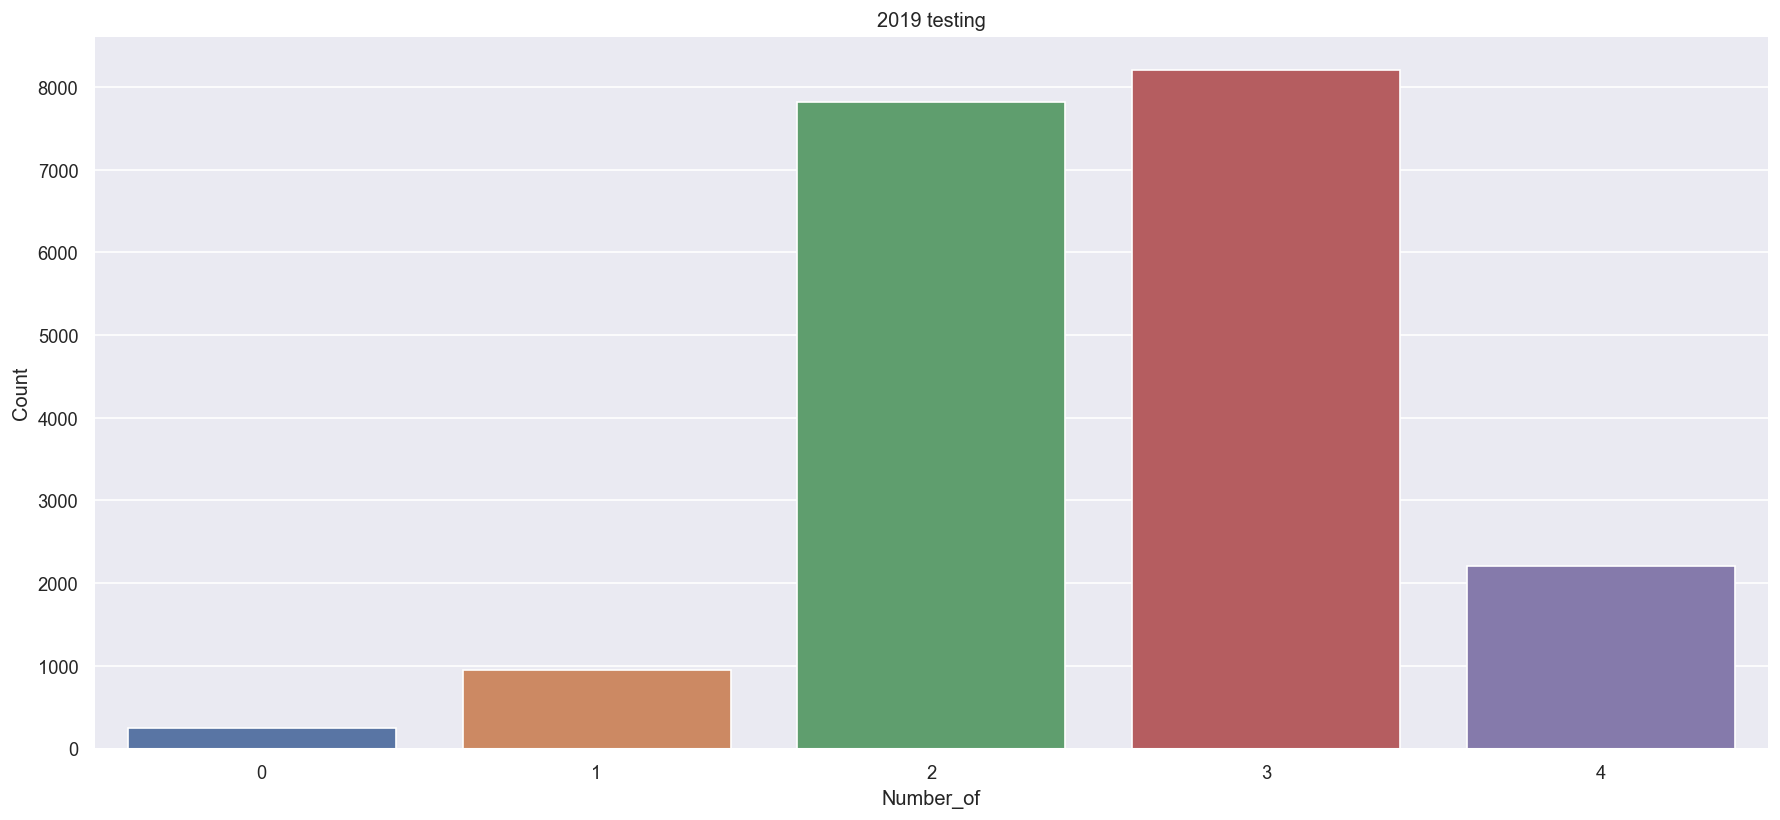

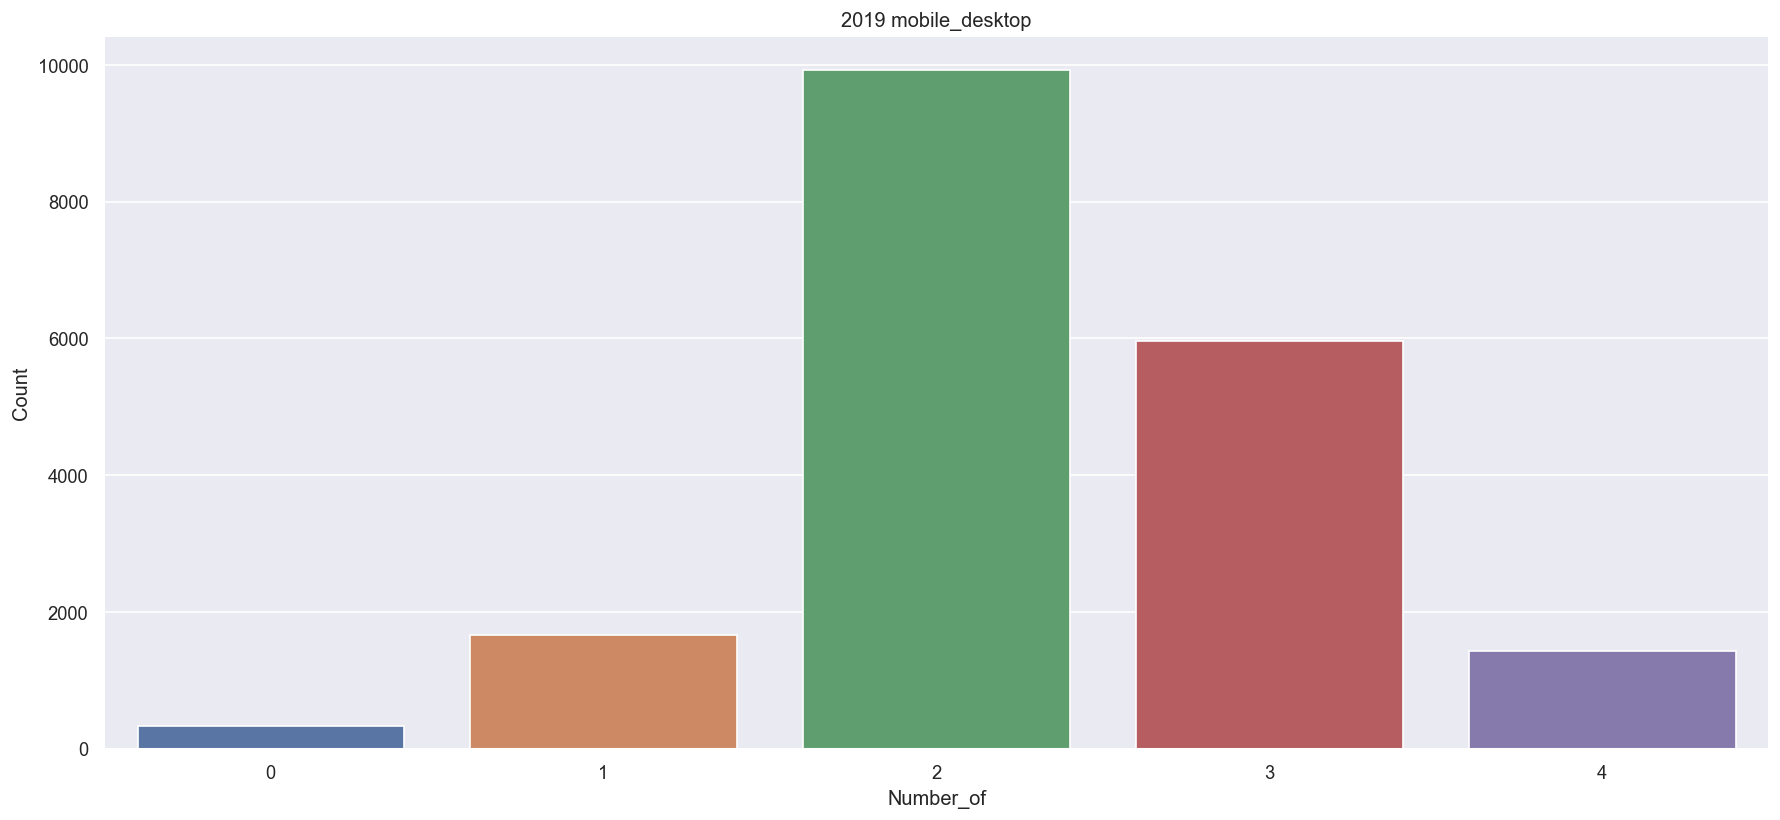

In [101]:
dummy = {}
for i in df.happiness.dropna():
    for j in i:
        try:
            dummy[j].append(i[j])
        except:
            dummy[j] = [i[j]]

dum = {}
for i in dummy:
    dum[i] = {}
    dum[i]['Number_of'] = []
    dum[i]['Count'] = []
    for j,k in Counter(dummy[i]).items():
            dum[i]['Number_of'].append(j)
            dum[i]['Count'].append(k)
    dum[i] = pd.DataFrame(dum[i])
    
Count_Happines = dum
    
for i in Count_Happines.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Number_of',y='Count',data=Count_Happines[i])
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title('2019 '+i)
    f.tight_layout()
    f.savefig(fname='img/2019/'+i+'dist_2019.png',format='png',dpi=150)
    plt.show()

# Opinions

In [107]:
df.opinions.dropna()[2]

{'building_js_apps_overly_complex': 1,
 'enjoy_building_js_apps': 3,
 'would_like_js_to_be_main_lang': 0,
 'js_moving_in_right_direction': 2,
 'js_over_used_online': 4,
 'js_ecosystem_changing_to_fast': 1,
 'missing_from_js': 'Native typing. New mode similar to "use strict" that makes `==` act as `===`, disables implicit casting, disables `var`, removes need for semicolon and fixes other design "mistakes".'}

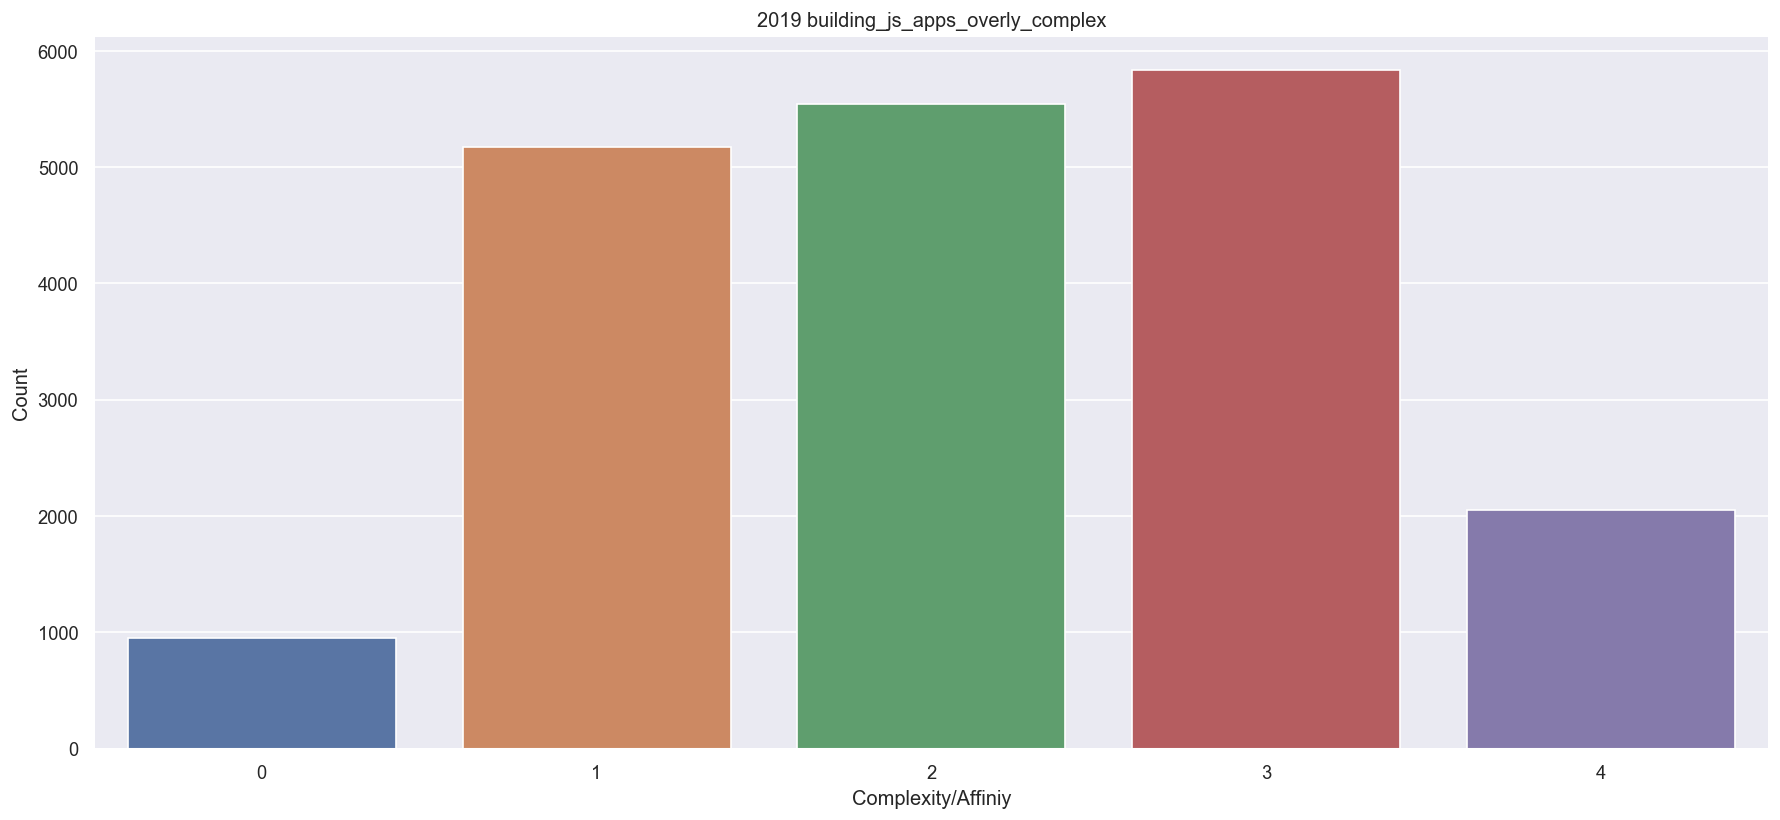

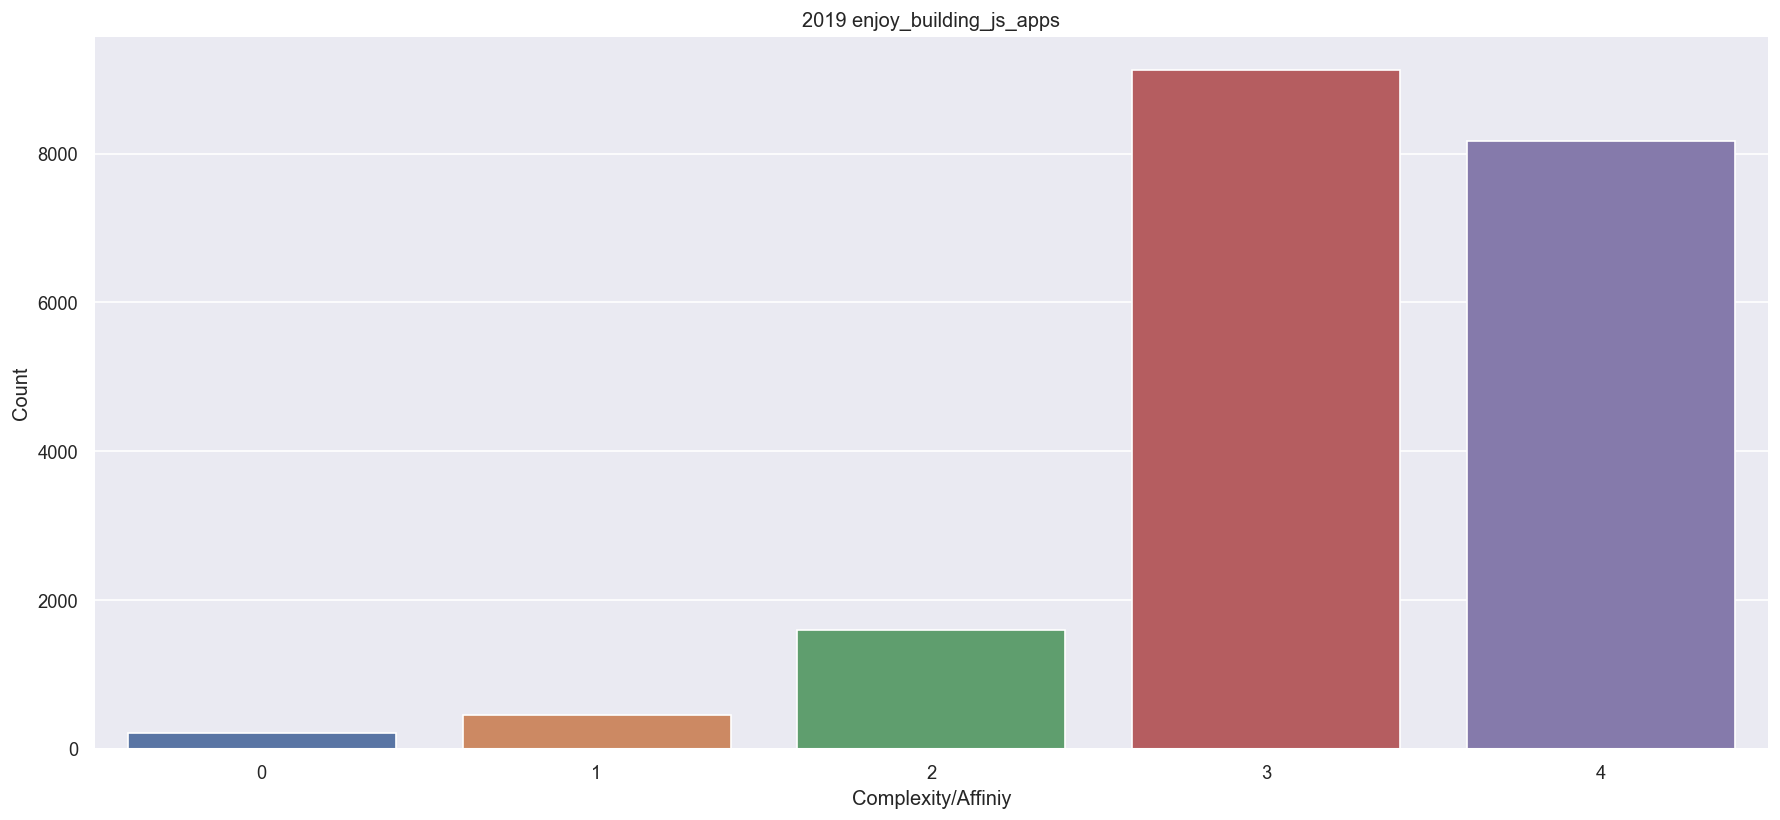

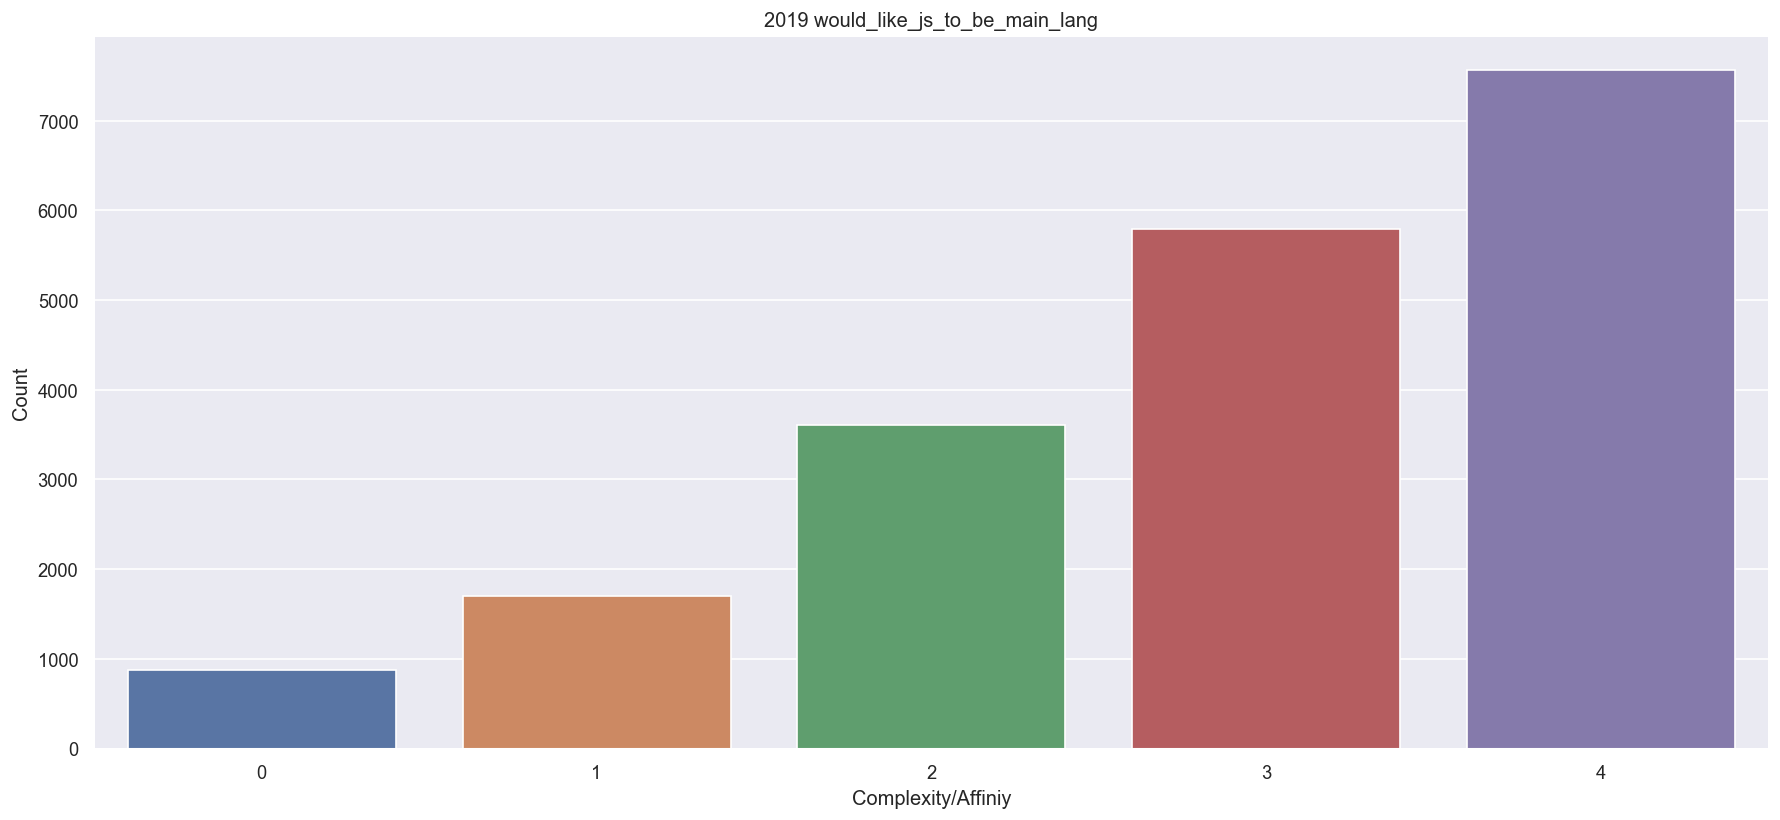

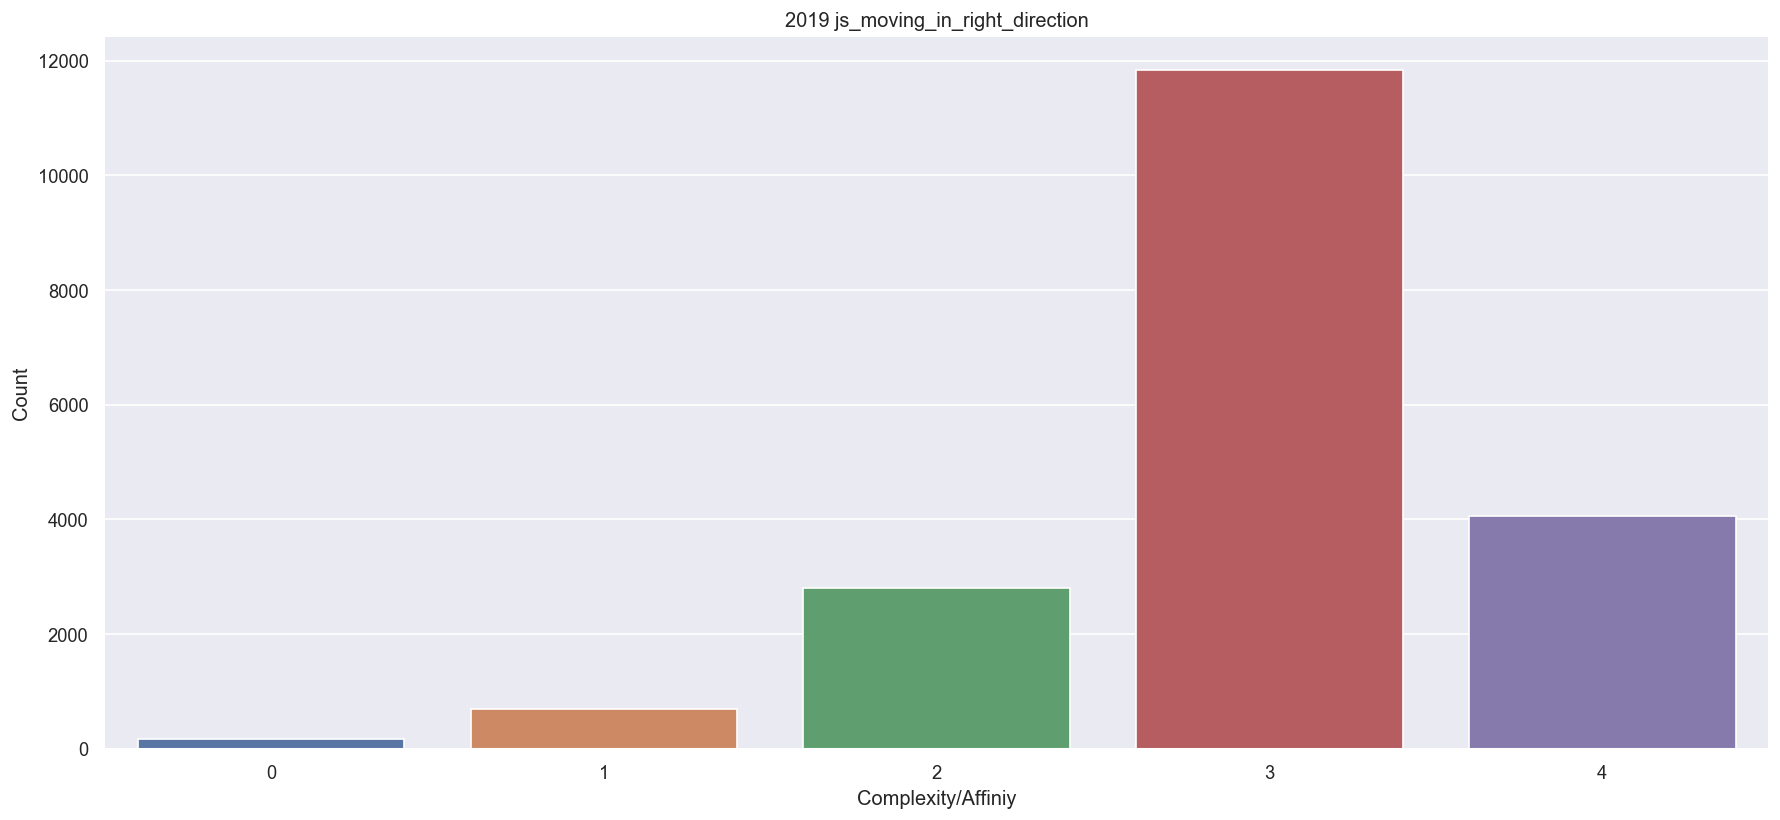

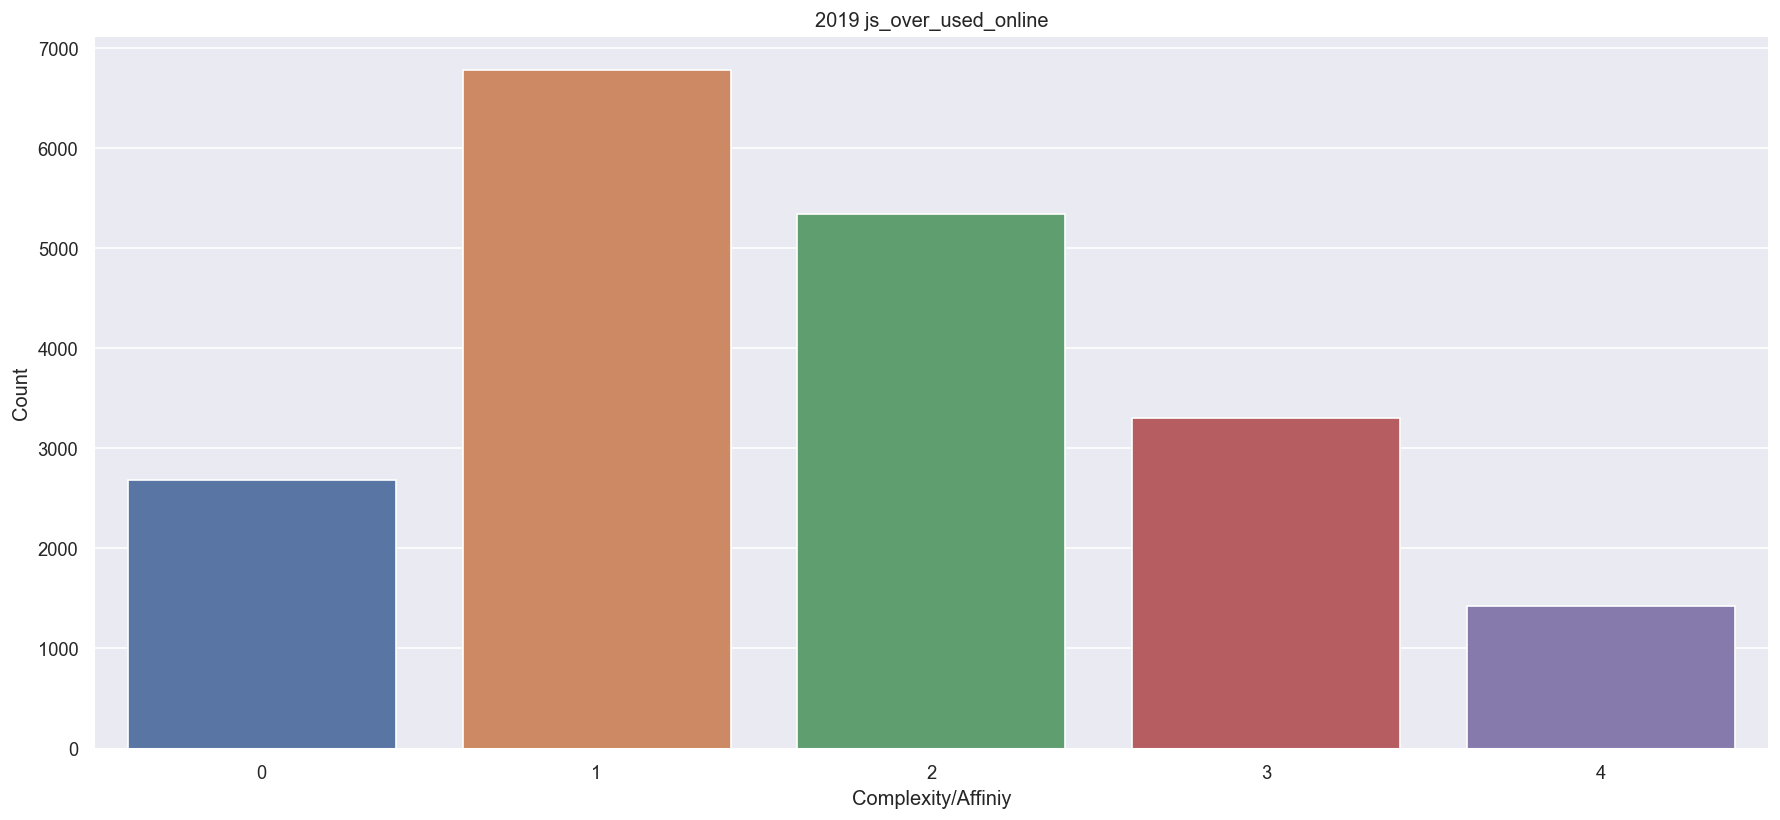

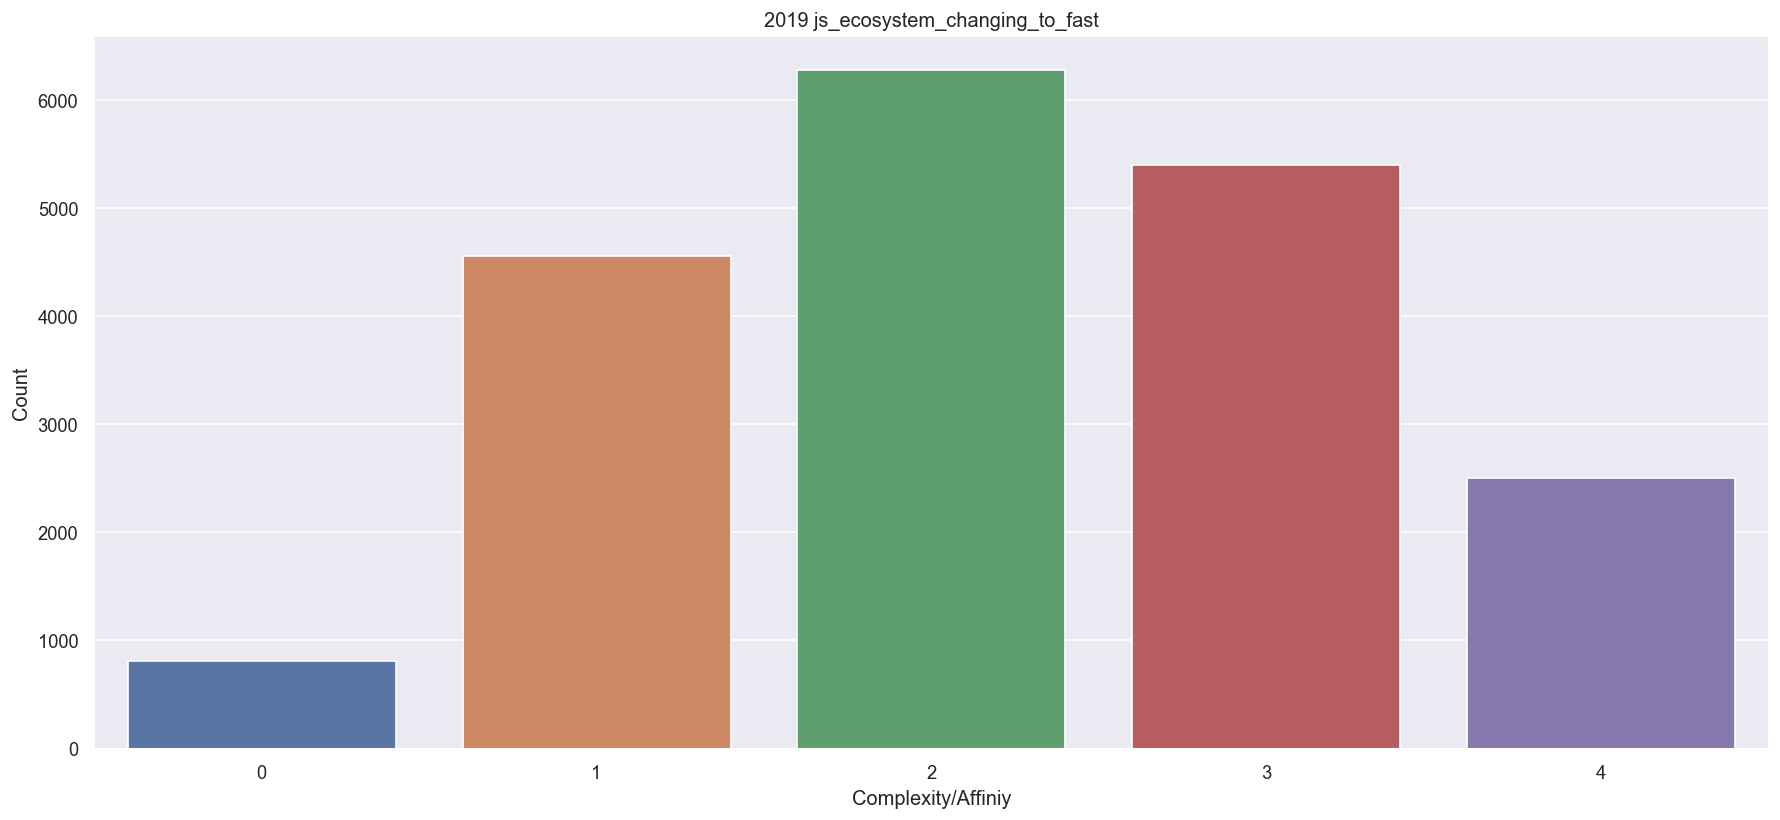

In [108]:
dummy = {}
for i in df.opinions.dropna():
    for j in i:
        if not 'missing' in j:
            try:
                dummy[j].append(i[j])
            except:
                dummy[j] = [i[j]]

dum = {}
for i in dummy:
    dum[i] = {}
    dum[i]['Complexity/Affiniy'] = []
    dum[i]['Count'] = []
    for j,k in Counter(dummy[i]).items():
            dum[i]['Complexity/Affiniy'].append(j)
            dum[i]['Count'].append(k)
    dum[i] = pd.DataFrame(dum[i])

Opinions_dict_DF = dum

for i in Opinions_dict_DF:
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Complexity/Affiniy',y='Count',data=Opinions_dict_DF[i])
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title('2019 '+i)
    f.tight_layout()
    f.savefig(fname='img/2019/'+i+'dist_2019.png',format='png',dpi=150)
    plt.show()

# Resources

In [121]:
df.resources.dropna()[5]

{'blogs_news_magazines': {'choices': ['css_tricks', 'devto']},
 'podcasts': {'choices': ['syntaxfm']},
 'sites_courses': {'choices': ['wesbos',
   'stack_overflow',
   'mdn',
   'w3schools']}}

In [113]:
df.resources[0]

{'blogs_news_magazines': {'choices': ['codrops',
   'css_tricks',
   'smashing_magazine',
   'david_walsh']},
 'sites_courses': {'choices': ['mdn', 'w3schools']}}

In [114]:
df.resources[1]

{'sites_courses': {'choices': ['stack_overflow',
   'w3schools',
   'codecademy',
   'w3schools']}}

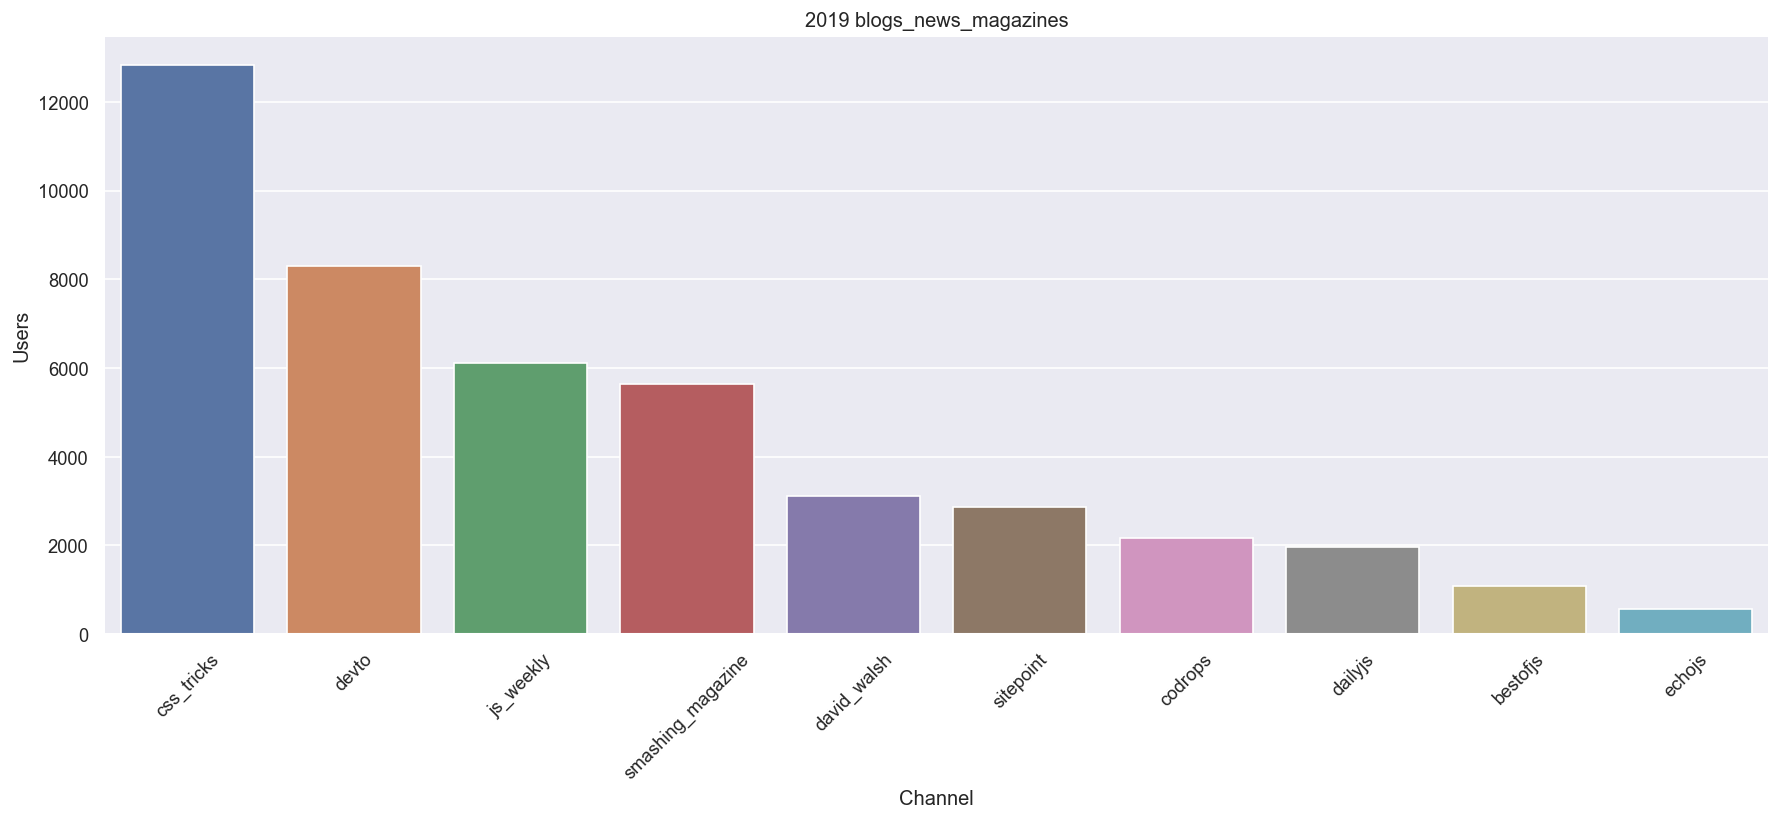

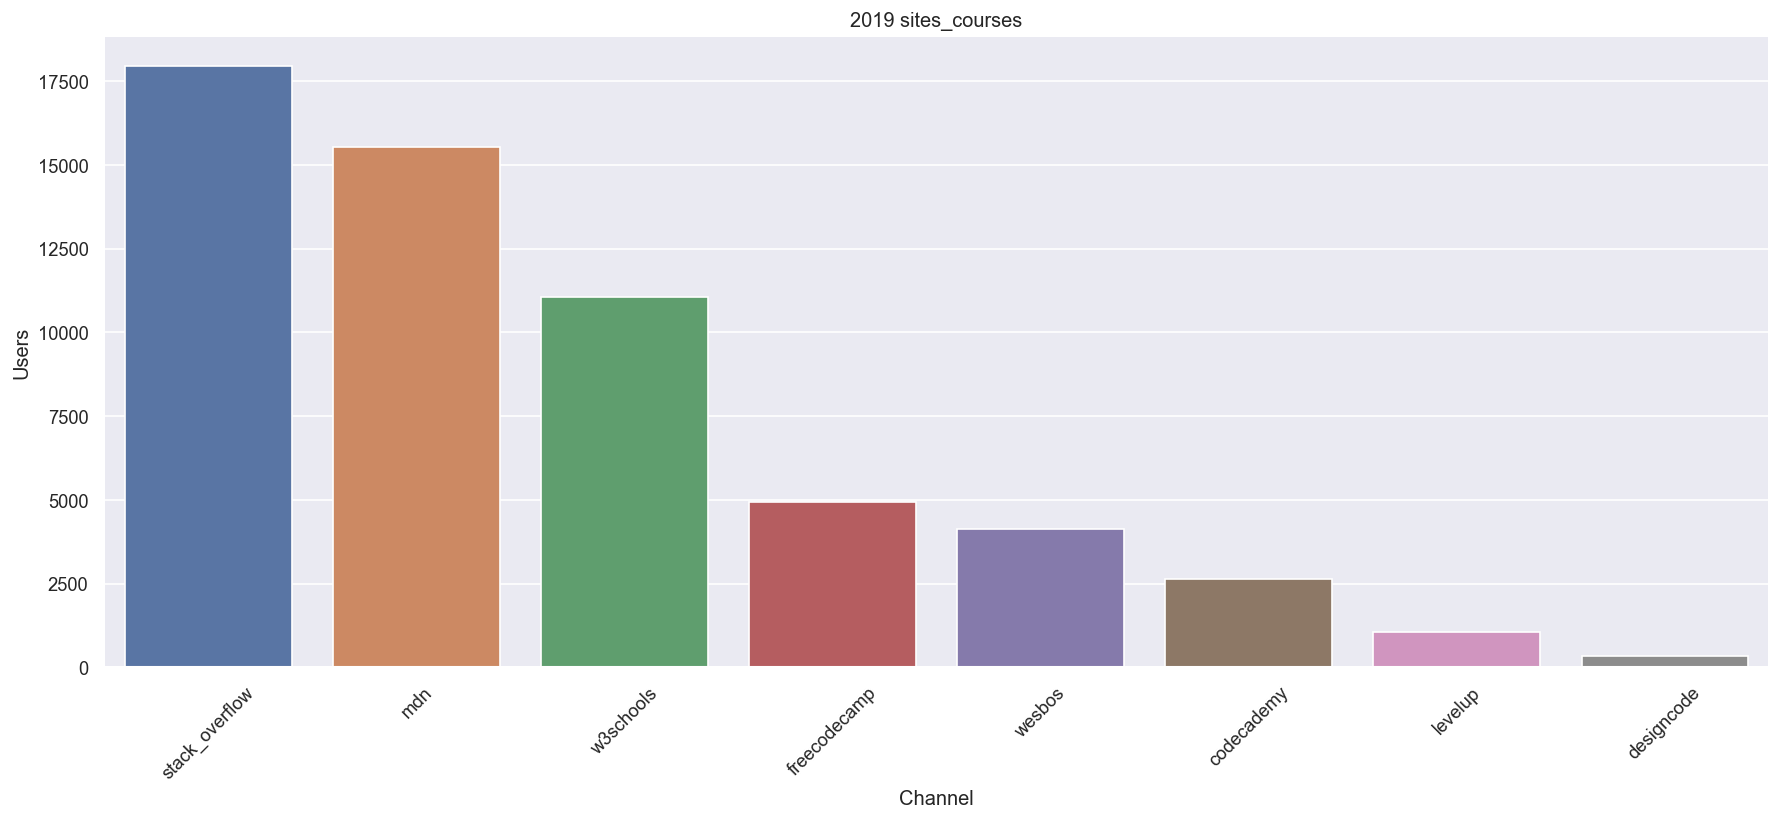

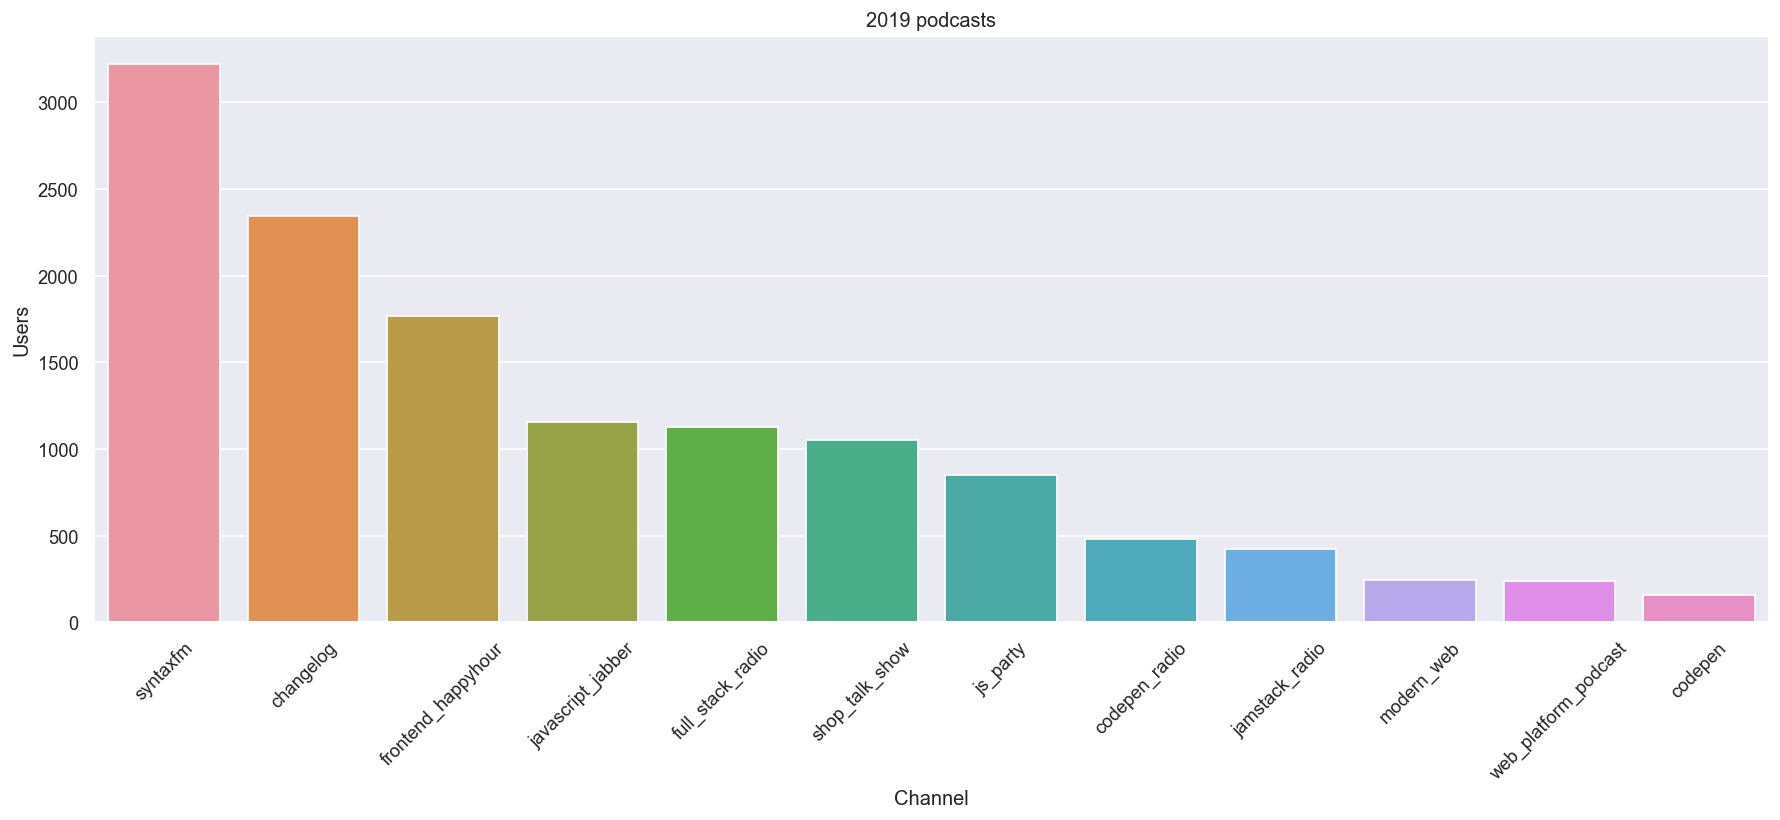

In [154]:
dummy = {}
for i in df.resources.dropna():
    for j in i:
        try:
            for k in i[j]['choices']:
                try:
                    dummy[j].append(k)
                except:
                    dummy[j] = [k]
        except:
            pass
dum = {}        
for k in dummy.keys():
    dum[k] = {}
    for i,j in Counter(dummy[k]).items():
        try:
            dum[k]['Channel'].append(i)
            dum[k]['Users'].append(j)
        except:
            dum[k]['Channel']=[i]
            dum[k]['Users']=[j]
    dum[k] = pd.DataFrame(dum[k])

Resources = dum
for i in Resources.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Channel',y='Users',data=Resources[i].sort_values('Users',ascending=False))
    ax.tick_params(axis = 'x', rotation = 45)
    ax.set_title('2019 '+i)
    f.tight_layout()
    f.savefig(fname='img/2019/resources'+i+'dist_2019.png',format='png',dpi=150)
    plt.show()

# Geo stuff

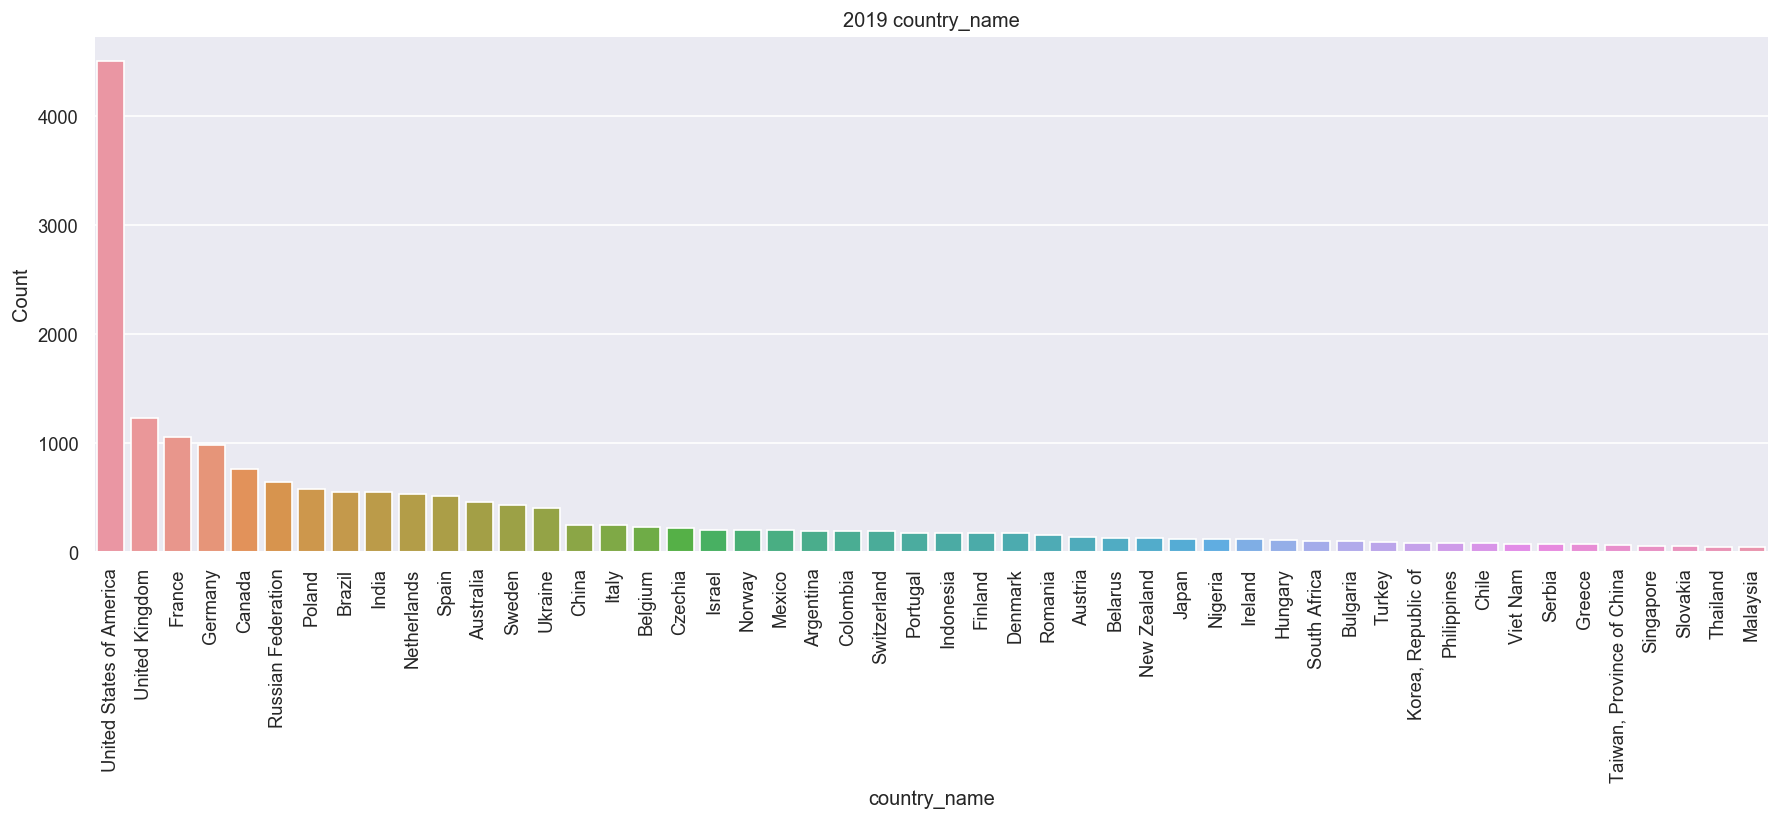

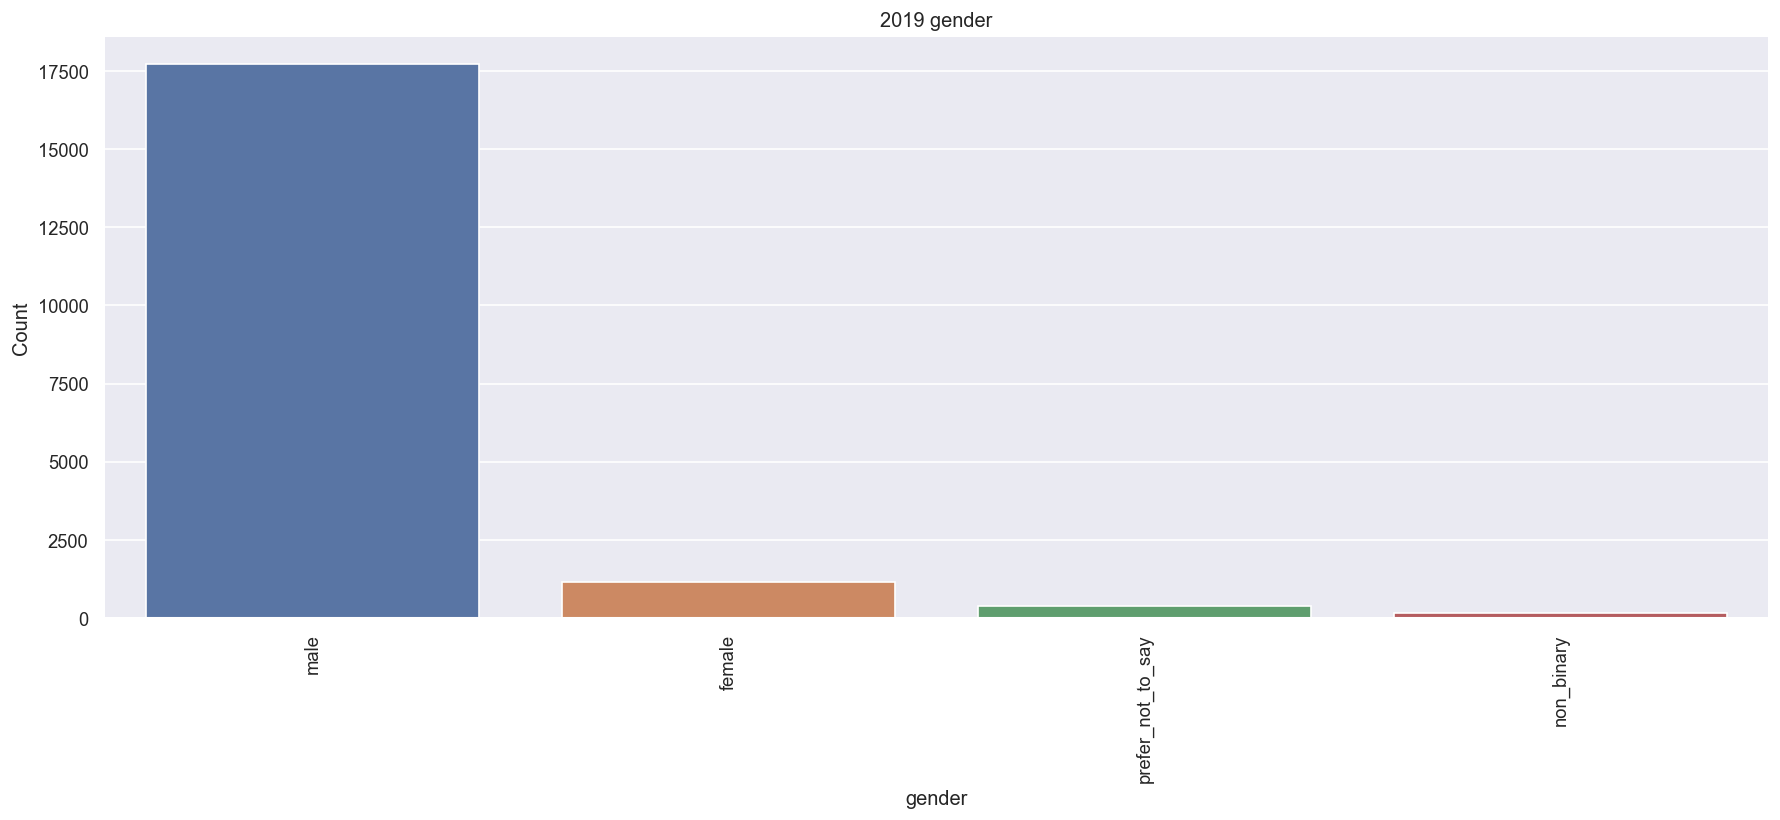

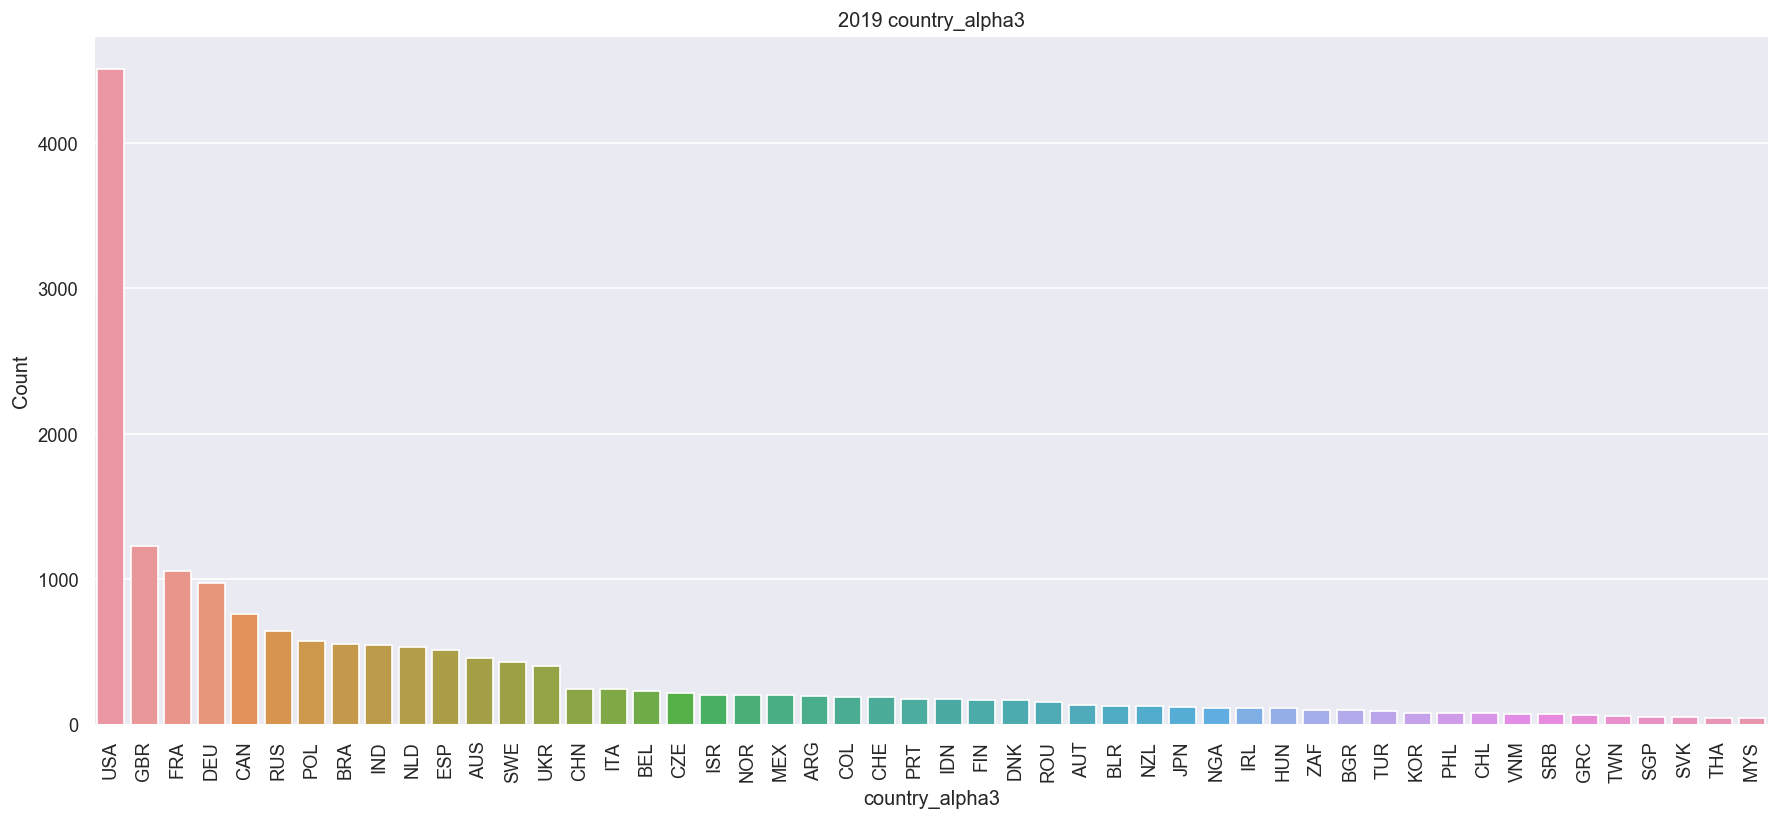

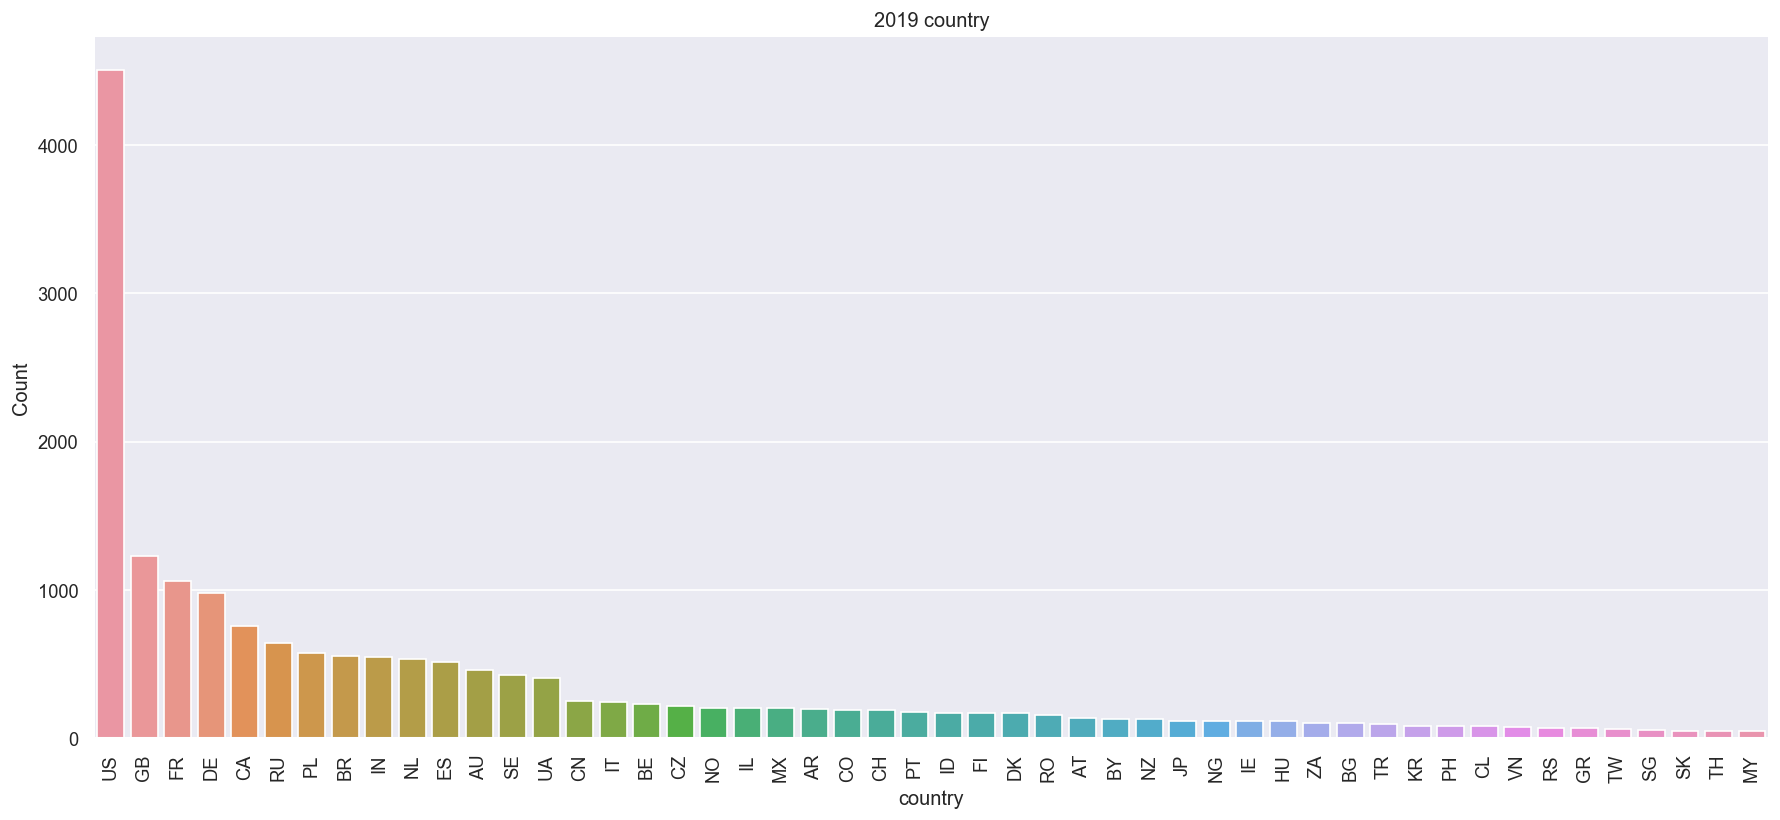

In [188]:
dummy = {}
Data_Names = ['country_name','gender','country_alpha3','country']
for i in df.user_info.dropna():
    for n in Data_Names:
        try:
            dummy[n].append(i[n])
        except:
            if n in i:
                dummy[n]=[i[n]]
            else:
                pass
dum = {}
for k in dummy.keys():
    dum[k] = {}
    for i,j in Counter(dummy[k]).items():
        try:
            dum[k][k].append(i)
            dum[k]['Count'].append(j)
        except:
            dum[k][k] = [i]
            dum[k]['Count'] = [j]
    dum[k] = pd.DataFrame(dum[k])

Demographics = dum
Demographics['country_name'].country_name=Demographics['country_name'].country_name.replace({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'})
for k in Demographics.keys():
    if not 'gender' in k:
        f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
        ax = sbn.barplot(x=k,y='Count',data=Demographics[k].sort_values('Count',ascending=False).iloc[:50])
        ax.tick_params(axis = 'x', rotation = 90)
        ax.set_title('2019 '+k)
        f.tight_layout()
        f.savefig(fname='img/2019/demographics'+k+'dist_2019.png',format='png',dpi=150)
        plt.show()
    else:
        f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
        ax = sbn.barplot(x=k,y='Count',data=Demographics[k].sort_values('Count',ascending=False))
        ax.tick_params(axis = 'x', rotation = 90)
        ax.set_title('2019 '+k)
        f.tight_layout()
        f.savefig(fname='img/2019/demographics'+k+'dist_2019.png',format='png',dpi=150)
        plt.show()